<a href="https://colab.research.google.com/github/radhakrishnan-omotec/eda-repo/blob/main/Crowdfunding_Dynamics_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### An In-Depth Analysis of Crowdfunding Dynamics: Unveiling Market Opportunities and Financial Inclusion Strategies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# sns.set(): This line is using the set() function from the seaborn library. sns.set() is used to set the aesthetic style of the plots created with seaborn. It basically applies a set of predefined style settings that enhance the overall look of the plots. By using sns.set(), you adopt the default seaborn theme, which is designed to be visually appealing.
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('ignore'): This line is using the filterwarnings function from the warnings module. It is configured to ignore warnings. In data analysis and visualization, there might be instances where certain functions or operations trigger warning messages. By using warnings.filterwarnings('ignore'), you instruct the interpreter to suppress these warning messages, making the output cleaner.
%matplotlib inline
# %matplotlib inline: This is a magic command in Jupyter Notebooks that enables the inline plotting of graphs generated by matplotlib. It ensures that the plots are displayed directly below the code cell that produces them.
pd.options.display.max_columns = 999
# pd.options.display.max_columns = 999: This line is setting an option in the pandas library to display a maximum of 999 columns when showing DataFrames.

### Loading the Datasets

In [ ]:
## From Kaggle's Kiva Crowdfunding Data
kiva_loans = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/December_2023/Crowd_Funding_Dynamics_Analysis/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/kiva_loans.csv")
loan_themes = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/December_2023/Crowd_Funding_Dynamics_Analysis/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/loan_themes_by_region.csv")
mpi_region_locations = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/December_2023/Crowd_Funding_Dynamics_Analysis/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/kiva_mpi_region_locations.csv")
country_stats = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/December_2023/Crowd_Funding_Dynamics_Analysis/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/country_stats.csv")
countries = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/December_2023/Crowd_Funding_Dynamics_Analysis/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/countries_of_the_world.csv")


### Exploring the available datasets

In [ ]:
loan_themes.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,7,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,1383,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,3,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [ ]:
# Renaming the columns
loan_themes.rename(columns={'Field Partner Name':'field_partner_name',
                            'Loan Theme ID':'loan_theme_id',
                            'Loan Theme Type':'loan_theme_type',
                            'Partner ID':'partner_id'}, inplace = True)


In [ ]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [ ]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [ ]:
mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


## Multidimensional Poverty Index

- The Multidimensional Poverty Index is a measure used to assess poverty by considering multiple dimensions of well-being beyond income or monetary factors alone. It provides a more comprehensive understanding of poverty by taking into account various indicators related to health, education, and standard of living.

- The MPI was developed by the Oxford Poverty and Human Development Initiative (OPHI) and the United Nations Development Programme (UNDP). It identifies individuals or households as multidimensionally poor if they are deprived in multiple indicators within these key dimensions.

- The indicators used in the MPI can include factors such as nutrition, child mortality, years of schooling, school attendance, cooking fuel, sanitation, safe drinking water, electricity, and housing. By considering a range of dimensions, the MPI provides a more nuanced and accurate picture of poverty, helping policymakers and researchers design more targeted interventions to address the diverse aspects of deprivation that people may face.

### Number of countries for which we have data

In [ ]:
kiva_loans['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [ ]:
len(kiva_loans['country'].unique())

87

### Period for which we have the loan data

In [ ]:
# Convert 'date' column to datetime type
kiva_loans['date'] = pd.to_datetime(kiva_loans['date'], errors='coerce')
# The errors parameter in the pd.to_datetime function specifies how errors should be handled during the conversion of date-like objects to datetime objects. In this case, when you use errors='coerce', it means that if there are any errors encountered during the conversion, the corresponding entries will be set to NaT (Not a Time) instead of raising an error.

# Find the lowest and highest dates
lowest_date = kiva_loans['date'].min()
highest_date = kiva_loans['date'].max()

# Print the results
print("Lowest Date: {}".format(lowest_date))
print("Highest Date: {}".format(highest_date))

Lowest Date: 2014-01-01 00:00:00
Highest Date: 2017-07-26 00:00:00


### Period for which we have the loan data is 01-01-2014 to 26-07-2017

# 1. Countries with Most number of loans & Maximum Total Loan Amount

- countries_loan_counts: The top 5 countries with the highest number of loans, sorted in descending order.

- countries_funded_amounts: The top 5 countries with the highest total funded amount, sorted in descending order.

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
countries_loan_counts = kiva_loans['country'].value_counts().head(5).sort_values(ascending=False)
# kiva_loans['country'].value_counts(): Count the number of occurrences of each unique country in the 'country' column of the kiva_loans DataFrame.

# .head(5): Select the top 5 countries based on the loan counts.

# .sort_values(ascending=False): Sort the countries in descending order based on the loan counts. This ensures that the country with the highest loan count comes first.

# Assign the result to the variable countries_loan_counts.

### Above Code Breakdown

In [ ]:
len(kiva_loans['country'])

671205

In [ ]:
len(kiva_loans['country'].unique())

87

In [ ]:
kiva_loans['country'].value_counts()

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
                  ...  
Afghanistan           2
Bhutan                2
Guam                  1
Mauritania            1
Cote D'Ivoire         1
Name: country, Length: 87, dtype: int64

In [ ]:
kiva_loans['country'].value_counts().head(5)

Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Name: country, dtype: int64

In [ ]:
kiva_loans['country'].value_counts().head(5).sort_values(ascending = False)

Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Name: country, dtype: int64

In [ ]:
countries_loan_counts.index

Index(['Philippines', 'Kenya', 'El Salvador', 'Cambodia', 'Pakistan'], dtype='object')

In [ ]:
countries_loan_counts.values

array([160441,  75825,  39875,  34836,  26857])

In [ ]:
print(type(countries_loan_counts))

<class 'pandas.core.series.Series'>


In [ ]:

for country, num_loan in countries_loan_counts.items():
  print(f"{country.title()} : {num_loan}")

Philippines : 160441
Kenya : 75825
El Salvador : 39875
Cambodia : 34836
Pakistan : 26857


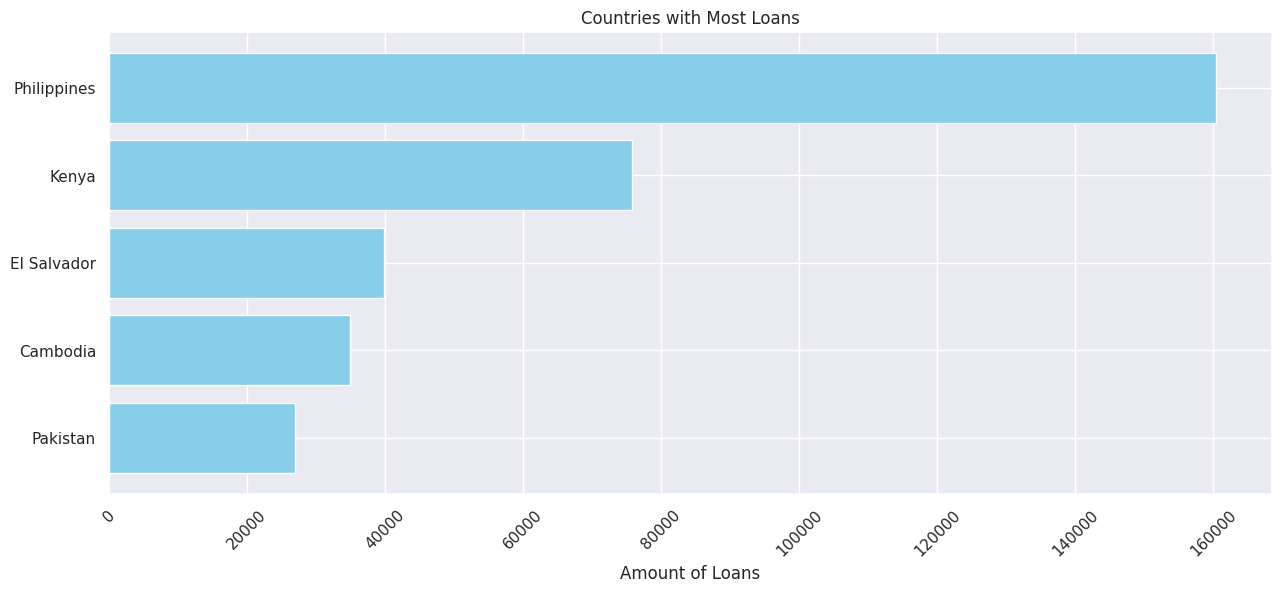

In [ ]:
# Plotting the bar chart for countries with most loans
plt.figure(figsize=(15, 6))
# plt.figure(figsize=(15, 6)): This line creates a new figure for the plot with a specified size. figsize=(15, 6) sets the width to 15 units and the height to 6 units. This helps control the dimensions of the plot.
plt.barh(countries_loan_counts.index, countries_loan_counts.values, color='skyblue')
# plt.barh(countries_loan_counts.index, countries_loan_counts.values, color='skyblue'): This line creates a horizontal bar chart using the barh function from Matplotlib. It takes two main arguments:
# countries_loan_counts.index: The x-axis values are taken from the index of the countries_loan_counts Series, representing the countries.
# countries_loan_counts.values: The y-axis values are taken from the values of the countries_loan_counts Series, representing the number of loans.
# color='skyblue': Sets the color of the bars to sky blue.
plt.xlabel('Amount of Loans')
# plt.xlabel('Amount of Loans'): This line adds a label to the x-axis, indicating that the axis represents the amount of loans.
plt.title('Countries with Most Loans')
# plt.title('Countries with Most Loans'): This line adds a title to the plot, indicating that it represents the countries with the most loans
plt.xticks(rotation=45)
# plt.xticks(rotation=45): This line rotates the x-axis tick labels by 45 degrees, making them more readable if they are long country names. This is especially useful when dealing with horizontal bar charts.
plt.gca().invert_yaxis()
# plt.gca().invert_yaxis(): This line inverts the y-axis, which is common in horizontal bar charts. It reverses the order of the countries, placing the one with the highest number of loans at the top of the plot.


## Insight 1 : Philippines has taken the most number of loans among all the 87 countries for which we have the data

In [ ]:
countries_funded_amounts = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending=False).head(5)
# kiva_loans.groupby(['country'])['funded_amount'].sum(): Group the DataFrame by the 'country' column and calculate the total funded amount for each country.

# .sort_values(ascending=False): Sort the countries in descending order based on the total funded amount.

# .head(5): Select the top 5 countries based on the total funded amount.

# Assign the result to the variable countries_funded_amounts.

## Above Code Breakdown

In [ ]:
kiva_loans.groupby(['country'])['funded_amount'].sum()

country
Afghanistan          14000.0
Albania            2490000.0
Armenia           11186675.0
Azerbaijan         2699575.0
Belize              114025.0
                     ...    
Vietnam           13661700.0
Virgin Islands           0.0
Yemen              1784075.0
Zambia             1147950.0
Zimbabwe           3372725.0
Name: funded_amount, Length: 87, dtype: float64

In [ ]:
kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending=False).head(5)

country
Philippines    54476375.0
Kenya          32248405.0
Peru           30394850.0
Paraguay       29412700.0
El Salvador    23357725.0
Name: funded_amount, dtype: float64

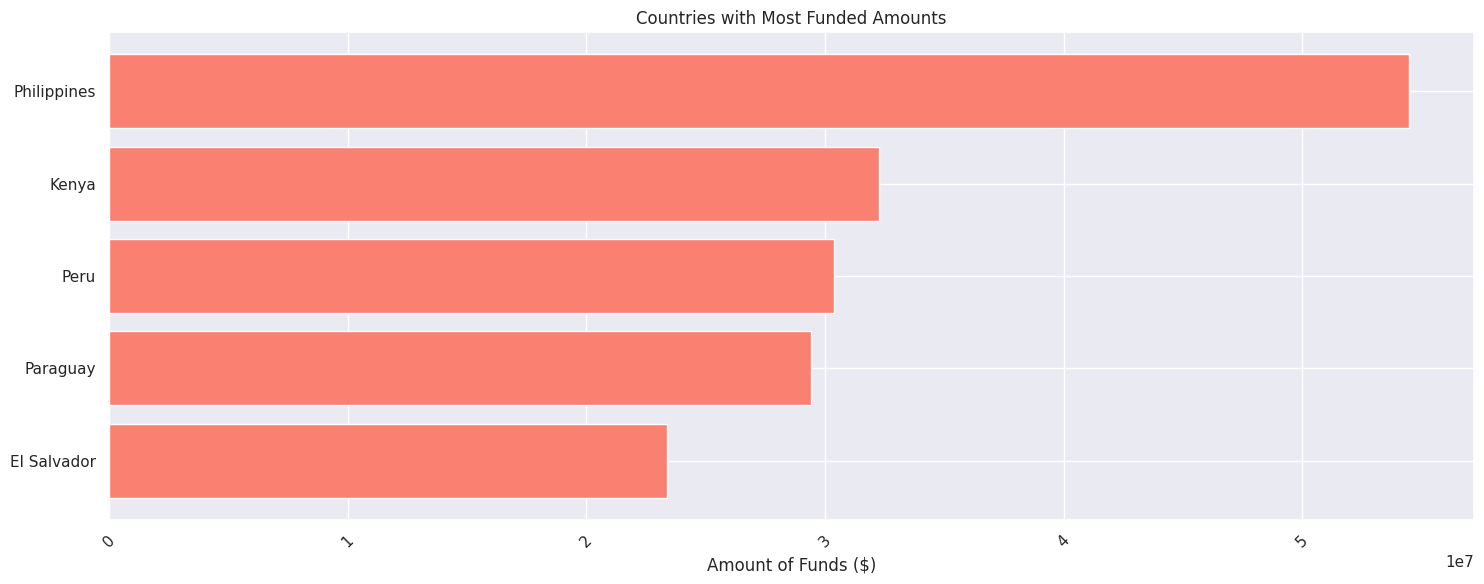

In [ ]:
# Plotting the bar chart for countries with most funded amounts
plt.figure(figsize=(15, 6))  # Adjust the width as needed
plt.barh(countries_funded_amounts.index, countries_funded_amounts.values, color='salmon')
plt.xlabel('Amount of Funds ($)')
plt.title('Countries with Most Funded Amounts')
# Rotate x-axis tick labels
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
# Adjust layout and display the plot
plt.tight_layout()
# plt.tight_layout(): This function adjusts the layout of the plot to make sure that all the elements (axes labels, title, etc.) fit within the figure area without overlapping. It is particularly useful when there are multiple subplots or when the figure has various components, ensuring that the plot looks well-organized and avoids overlapping text.
plt.show()
# plt.show(): This function is responsible for displaying the plot. After creating and customizing the plot using various Matplotlib functions, the show() function is called to render the final plot. It opens a separate window (or displays the plot inline in a Jupyter notebook) and shows the visual representation of the data.


## Insight 2 : Philippines has taken the Highest loan amount ($ 54476375.0)

## Insight 3 : Phillipines has taken the highest number of loans & is also the most funded country, Kenya is the country with the second highest number of loans & the second highest funded amount

# 2. Analysis of the Most Funded Countries (Countries with the Highest Loan/Fund Amount)

### Dataframe containing the details of the countries with the maximum loan amount is being created

In [ ]:
selected_countries = ['Philippines','Kenya','Peru', 'Paraguay', 'El Salvador']

filtered_kiva_loans = kiva_loans[(kiva_loans['country'].isin(selected_countries))]
filtered_kiva_loans.head()


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,2014-01-02 18:40:01+00:00,13.0,7,#Vegan,female,irregular,2014-01-02
49,653418,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,81.0,2014-01-02 22:17:55+00:00,2013-12-21 08:00:00+00:00,2014-01-30 00:19:42+00:00,14.0,18,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02
51,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02


In [ ]:
filtered_kiva_loans["country"].unique()

array(['Kenya', 'El Salvador', 'Philippines', 'Peru', 'Paraguay'],
      dtype=object)

In [ ]:
filtered_kiva_loans["country"].value_counts()

Philippines    160441
Kenya           75825
El Salvador     39875
Peru            22233
Paraguay        11903
Name: country, dtype: int64

### 1. Percentage wise distribution of number of loans for the countries with Highest Loan amounts

In [ ]:
# Calculate the top 5 countries with the most loans
top_countries = filtered_kiva_loans['country'].value_counts().head(5).index
top_countries

Index(['Philippines', 'Kenya', 'El Salvador', 'Peru', 'Paraguay'], dtype='object')

In [ ]:
# Filter the DataFrame for the top 5 countries
top_countries_loans = filtered_kiva_loans[filtered_kiva_loans['country'].isin(top_countries)]
len(top_countries_loans)

310277

In [ ]:
# Calculate the total loan amount for each country
total_loan_amounts = top_countries_loans.groupby('country')['loan_amount'].sum()

# top_countries_loans: This is assumed to be a DataFrame containing information about loans in different countries.

# .groupby('country'): This part of the code groups the DataFrame by the unique values in the 'country' column. After this operation, you have a DataFrameGroupBy object, which is essentially a collection of DataFrame grouped by a specific column ('country' in this case).

# ['loan_amount']: This specifies the column for which you want to perform the aggregation. In this case, it's 'loan_amount'. It selects the 'loan_amount' column for further operations.

# .sum(): This part calculates the sum of the 'loan_amount' for each group created by the 'country' column. It aggregates the loan amounts within each country, providing the total loan amount for each country.

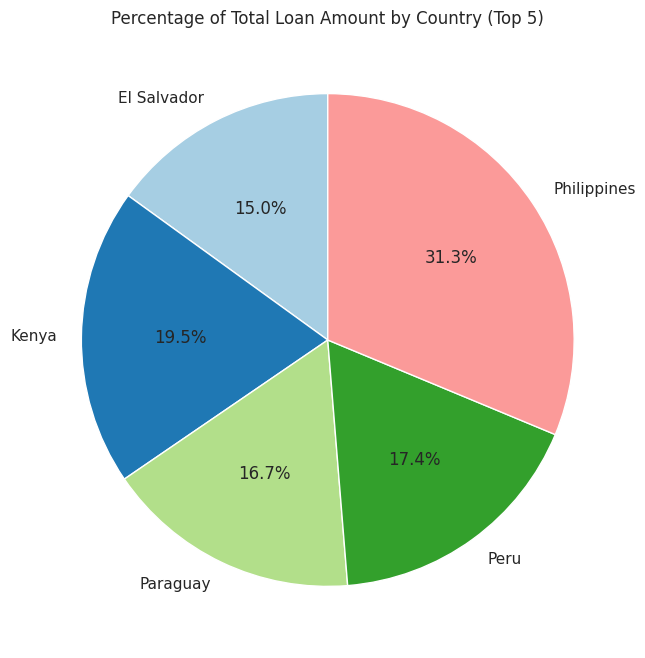

In [ ]:
# Plotting the pie chart based on total loan amount
plt.figure(figsize=(8, 8))
plt.pie(total_loan_amounts, labels=total_loan_amounts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
# plt.pie(total_loan_amounts, labels=total_loan_amounts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors): This line creates the pie chart using the pie function from Matplotlib. Here are the parameters used:
# total_loan_amounts: This is assumed to be a Pandas Series where the index consists of unique countries, and the values are the total loan amounts for each country.
# labels=total_loan_amounts.index: Sets the labels for each slice of the pie chart to be the country names, taken from the index of total_loan_amounts.
# autopct='%1.1f%%': Displays the percentage of each slice on the pie chart with one decimal place.
# startangle=90: Rotates the pie chart so that the first slice starts at a 90-degree angle (from the top).
# colors=plt.cm.Paired.colors: Specifies the colors for each slice. The plt.cm.Paired.colors provides a set of paired colors from the Paired colormap in Matplotlib.

plt.title('Percentage of Total Loan Amount by Country (Top 5)')
plt.show()


## Insight 4 : 31.3 % of the total loan amount given to the top 5 countries is taken by Phillipines. 19.5 % of the total loan amount given to the top 5 countries is taken by Kenya.

In [ ]:
total_loan_amounts

country
El Salvador    26603650.0
Kenya          34534300.0
Paraguay       29629075.0
Peru           30867400.0
Philippines    55342225.0
Name: loan_amount, dtype: float64

## 2. Regions with Most number of loans & Maximum loan Amounts from the Top 5 countries with most loans & highest loan amounts

In [ ]:
filtered_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,2014-01-02 18:40:01+00:00,13.0,7,#Vegan,female,irregular,2014-01-02
49,653418,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,81.0,2014-01-02 22:17:55+00:00,2013-12-21 08:00:00+00:00,2014-01-30 00:19:42+00:00,14.0,18,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02
51,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02


In [ ]:
# Find and replace "CUSCO" with "Cusco" in the 'region' column
filtered_kiva_loans['region'] = filtered_kiva_loans['region'].replace('CUSCO', 'Cusco')

In [ ]:
regions_loan_counts = filtered_kiva_loans['region'].value_counts().head(5).sort_values(ascending=False)
regions_fund_amounts = filtered_kiva_loans.groupby(['region'])['funded_amount'].sum().sort_values(ascending=False).head(5)

In [ ]:
regions_loan_counts

Cusco              5555
Kisii              3546
Palo, Leyte        3320
Narra, Palawan     3197
Quezon, Palawan    3120
Name: region, dtype: int64

In [ ]:
regions_fund_amounts

region
Cusco              8710625.0
Ita                2559775.0
Ciudad del Este    2455400.0
Encarnación        2224275.0
Caaguazú           2149100.0
Name: funded_amount, dtype: float64

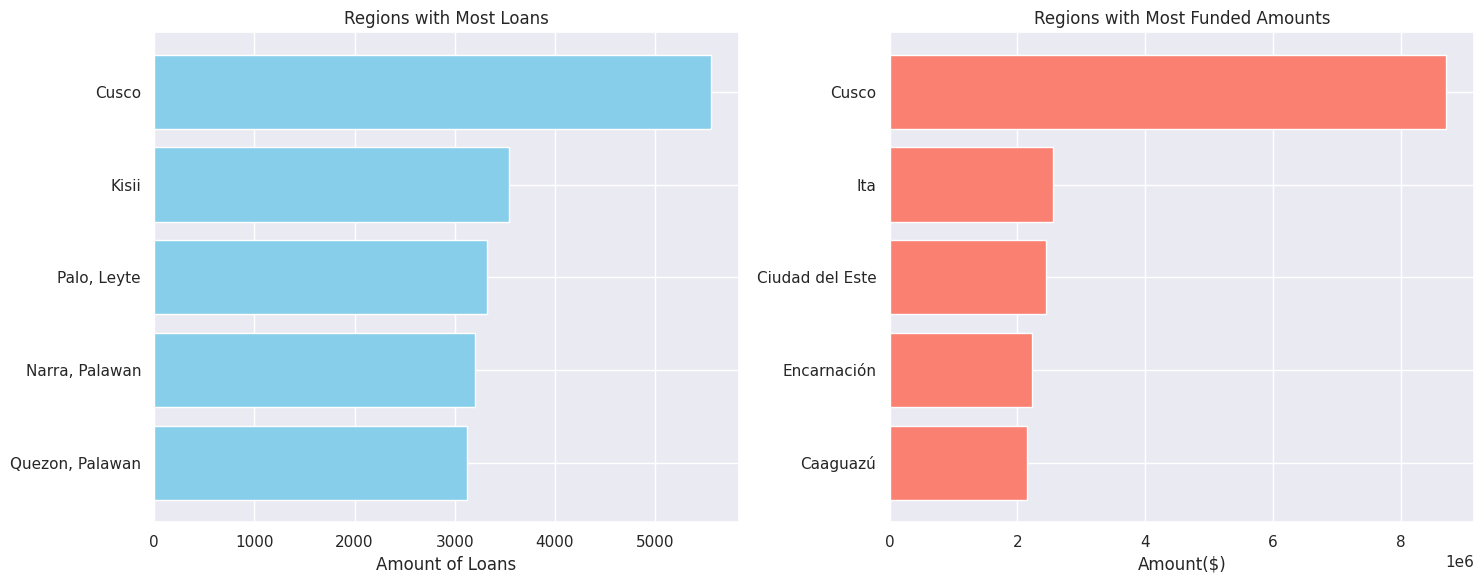

In [ ]:
# Plotting the bar chart for regions with most loans
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(regions_loan_counts.index, regions_loan_counts.values, color='skyblue')
plt.xlabel('Amount of Loans')
plt.title('Regions with Most Loans')
plt.gca().invert_yaxis()

# Plotting the bar chart for regions with most funded amounts
plt.subplot(1, 2, 2)
plt.barh(regions_fund_amounts.index, regions_fund_amounts.values, color='salmon')
plt.xlabel('Amount($)')
plt.title('Regions with Most Funded Amounts')
plt.gca().invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
regions_loan_counts_country = filtered_kiva_loans.groupby(['region', 'country'])['funded_amount'].count().reset_index()

regions_fund_amounts_country = filtered_kiva_loans.groupby(['region', 'country'])['funded_amount'].sum().reset_index()

In [ ]:
filtered_kiva_loans.groupby(['region', 'country'])['funded_amount'].count().reset_index()

,region,country,funded_amount
0,"214 Bonifacio St. Calaocan, Alicia, Isabela",Philippines,1
1,26 barrientos st. oroquieta city,Philippines,1
2,26 de Octubre-Piura,Peru,1
3,A.H. Saul Santoral - Chiclayo,Peru,1
4,ACCHA - PARURO,Peru,1
...,...,...,...
4678,"villaflor, oro.city",Philippines,1
4679,"villaflor,oroquieta city",Philippines,1
4680,"village market,nairobi",Kenya,1
4681,western pob. lopez jaena,Philippines,1


### Countries for regions with highest number of loans

In [ ]:
regions_of_interest = ['Cusco', 'Kisii', 'Palo, Leyte', 'Narra, Palawan', 'Quezon, Palawan']

# Filter the dataset for the regions of interest
filtered_regions_data = filtered_kiva_loans[filtered_kiva_loans['region'].isin(regions_of_interest)]


In [ ]:
filtered_regions_data

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
1442,654449,500.0,500.0,Home Products Sales,Retail,to purchase additional boxes of kitchenware to...,PH,Philippines,"Quezon, Palawan",PHP,145.0,2014-01-07 04:22:25+00:00,2013-12-11 08:00:00+00:00,2014-01-12 01:43:45+00:00,8.0,14,#Woman Owned Biz,female,irregular,2014-01-07
1469,654448,650.0,650.0,General Store,Retail,"to buy items to sell like soap, milk, sugar, e...",PH,Philippines,"Quezon, Palawan",PHP,145.0,2014-01-07 04:16:10+00:00,2013-12-11 08:00:00+00:00,2014-01-13 03:39:58+00:00,8.0,19,"#Elderly, #Repeat Borrower, #Woman Owned Biz, ...",female,irregular,2014-01-07
1508,654451,650.0,650.0,Fishing,Food,to buy additional fishing nets,PH,Philippines,"Quezon, Palawan",PHP,145.0,2014-01-07 04:29:07+00:00,2013-12-11 08:00:00+00:00,2014-01-08 15:56:29+00:00,8.0,22,"#Parent, #Woman Owned Biz, user_favorite, user...",female,irregular,2014-01-07
1585,654446,450.0,450.0,Veterinary Sales,Agriculture,to purchase additional supplies to sell,PH,Philippines,"Quezon, Palawan",PHP,145.0,2014-01-07 04:07:30+00:00,2013-12-11 08:00:00+00:00,2014-01-08 04:05:55+00:00,8.0,16,NaN,female,irregular,2014-01-07
1586,654455,450.0,450.0,Fishing,Food,to buy additional fishing materials for her bu...,PH,Philippines,"Quezon, Palawan",PHP,145.0,2014-01-07 04:50:06+00:00,2013-12-13 08:00:00+00:00,2014-01-07 23:03:52+00:00,8.0,17,"user_favorite, user_favorite",female,irregular,2014-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665733,1328507,175.0,175.0,Personal Housing Expenses,Housing,to build a sanitary toilet for her family.,PH,Philippines,"Quezon, Palawan",PHP,145.0,2017-06-28 06:49:31+00:00,2017-05-30 07:00:00+00:00,2017-07-07 02:27:55+00:00,14.0,5,"#Eco-friendly, #Health and Sanitation, #Parent",female,irregular,2017-06-28
665744,1328529,200.0,200.0,Personal Housing Expenses,Housing,to build a sanitary toilet for her family.,PH,Philippines,"Quezon, Palawan",PHP,145.0,2017-06-28 07:10:13+00:00,2017-05-30 07:00:00+00:00,2017-07-06 17:52:10+00:00,14.0,5,#Eco-friendly,female,irregular,2017-06-28
665758,1328547,500.0,500.0,Fishing,Food,"to buy fishing materials, fishing nets, tackle...",PH,Philippines,"Quezon, Palawan",PHP,145.0,2017-06-28 07:28:30+00:00,2017-05-31 07:00:00+00:00,2017-07-06 19:41:31+00:00,8.0,1,NaN,female,irregular,2017-06-28
665800,1329476,100.0,100.0,Rickshaw,Transportation,"to buy spare parts, and other supplies needed ...",PH,Philippines,"Palo, Leyte",PHP,145.0,2017-06-29 08:14:07+00:00,2017-06-07 07:00:00+00:00,2017-07-10 08:22:54+00:00,8.0,1,"#Repair Renew Replace, #Parent, #Woman Owned B...",female,irregular,2017-06-29


In [ ]:
# Get unique countries for each region
countries_by_region = filtered_regions_data.groupby('region')

In [ ]:
print(type(countries_by_region))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
countries_by_region['funded_amount']

In [ ]:
selected_columns = ['region', 'funded_amount']

# Use the loc accessor to select specific columns by names
result = countries_by_region.apply(lambda group: group.loc[:, selected_columns])

# countries_by_region: This is assumed to be a DataFrame resulting from a groupby operation on some original DataFrame. It has groups based on the 'region' column.

# .apply(lambda group: ...): The apply function is used to apply a function to each group in the countries_by_region DataFrame. In this case, the function is defined using a lambda function.

# lambda group: group.loc[:, selected_columns]: The lambda function takes a group (subset of the original DataFrame) as an argument and uses loc to select specific columns from that group. selected_columns is a list of column names to be selected.

# The result of applying this lambda function to each group is a new DataFrame where each group retains only the selected columns.

# Print the resulting DataFrame
print(result)


                 region  funded_amount
1442    Quezon, Palawan          500.0
1469    Quezon, Palawan          650.0
1508    Quezon, Palawan          650.0
1585    Quezon, Palawan          450.0
1586    Quezon, Palawan          450.0
...                 ...            ...
665733  Quezon, Palawan          175.0
665744  Quezon, Palawan          200.0
665758  Quezon, Palawan          500.0
665800      Palo, Leyte          100.0
666534      Palo, Leyte          100.0

[18738 rows x 2 columns]


## Regions with the highest number of loans from the top 5 most funded countries & their number of loans

In [ ]:
for region in regions_of_interest:
    # Boolean indexing to filter rows where 'region' is the current region
    filtered_rows = filtered_regions_data[filtered_regions_data['region'] == region]

    # Get the number of rows for the current region
    number_of_rows = len(filtered_rows)

    print(f"Number of rows with region '{region}': {number_of_rows}")


Number of rows with region 'Cusco': 5555
Number of rows with region 'Kisii': 3546
Number of rows with region 'Palo, Leyte': 3320
Number of rows with region 'Narra, Palawan': 3197
Number of rows with region 'Quezon, Palawan': 3120


In [ ]:
# Get unique countries for each region
countries_by_region = filtered_regions_data.groupby('region')['country'].unique()

In [ ]:
countries_by_region

region
Cusco                     [Peru]
Kisii                    [Kenya]
Narra, Palawan     [Philippines]
Palo, Leyte        [Philippines]
Quezon, Palawan    [Philippines]
Name: country, dtype: object

In [ ]:
# Display the result
for region, countries in countries_by_region.items():
    print(f"{region} : {', '.join(countries)}")
    # print(f"{region} : {countries}")

Cusco : Peru
Kisii : Kenya
Narra, Palawan : Philippines
Palo, Leyte : Philippines
Quezon, Palawan : Philippines


## Insight 5 : The regions with the highest number of loans from the top 5 most funded countries are as follows :

- Cusco : Peru
- Kisii : Kenya
- Narra, Palawan : Philippines
- Palo, Leyte : Philippines
- Quezon, Palawan : Philippines

## 3 out of the 5 regions with the highest number of loans from the top 5 most funded countries are from philippines. The regions with the highest number of loans from philippines are as follows :

- Narra, Palawan : Philippines
- Palo, Leyte : Philippines
- Quezon, Palawan : Philippines

## 1 out of the 5 regions with the highest number of loans from the top 5 most funded countries is from kenya. The region with the highest number of loans from kenya is as follows :

- Kisii : Kenya

### Countries for regions with highest loan amounts

In [ ]:
regions_of_interest = ['Cusco', 'Ita', 'Ciudad del Este', 'Encarnación', 'Caaguazú']

# Filter the dataset for the regions of interest
filtered_regions_data = filtered_kiva_loans[filtered_kiva_loans['region'].isin(regions_of_interest)]

In [ ]:
filtered_regions_data

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
2910,656270,675.0,675.0,Higher education costs,Education,to pay university tuition.,PY,Paraguay,Encarnación,PYG,58.0,2014-01-10 23:06:17+00:00,2013-12-10 08:00:00+00:00,2014-02-05 08:48:16+00:00,12.0,25,"user_favorite, user_favorite, user_favorite",female,monthly,2014-01-10
2935,656252,6650.0,6650.0,Food Production/Sales,Food,to buy ingredients.,PE,Peru,Cusco,PEN,119.0,2014-01-10 21:19:01+00:00,2014-01-10 08:00:00+00:00,2014-01-14 13:21:17+00:00,6.0,104,"user_favorite, #Repeat Borrower, #Parent, #Wom...","female, female, male, female, female, female, ...",irregular,2014-01-10
3827,656908,1200.0,1200.0,Retail,Retail,"to buy sugar, rice, noodles, various soaps and...",PY,Paraguay,Ciudad del Este,PYG,58.0,2014-01-14 03:50:16+00:00,2013-12-13 08:00:00+00:00,2014-02-17 17:12:17+00:00,14.0,44,NaN,female,monthly,2014-01-14
4068,657286,1975.0,1975.0,Cosmetics Sales,Retail,to buy cosmetics to sell.,PY,Paraguay,Encarnación,PYG,58.0,2014-01-14 23:33:21+00:00,2013-12-16 08:00:00+00:00,2014-02-05 01:52:32+00:00,6.0,3,NaN,"female, female, female, female, female, female...",irregular,2014-01-14
4148,656889,675.0,675.0,Higher education costs,Education,to pay transportation expenses,PY,Paraguay,Ita,PYG,58.0,2014-01-14 02:51:56+00:00,2013-12-13 08:00:00+00:00,2014-02-06 17:51:28+00:00,14.0,27,NaN,female,monthly,2014-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670923,1337252,300.0,300.0,Higher education costs,Education,to pay university tuition fees.,PY,Paraguay,Encarnación,PYG,58.0,2017-07-11 04:05:05+00:00,2017-06-09 07:00:00+00:00,2017-07-12 16:57:17+00:00,14.0,3,"volunteer_pick, #Repeat Borrower, #Schooling",female,monthly,2017-07-11
671110,1338784,2700.0,2700.0,Perfumes,Retail,to buy a range of clothing and perfumes to sell.,PY,Paraguay,Ita,PYG,58.0,2017-07-13 02:54:56+00:00,2017-06-13 07:00:00+00:00,2017-07-15 20:23:53+00:00,5.0,21,#Woman Owned Biz,"female, female, female, female, female, female...",irregular,2017-07-13
671124,1338711,1825.0,2975.0,Retail,Retail,"to buy beverages, baked goods, vegetables, fru...",PY,Paraguay,Caaguazú,PYG,58.0,2017-07-13 01:27:15+00:00,2017-06-13 07:00:00+00:00,NaN,8.0,20,#Woman Owned Biz,"female, female, female, female, female, female...",monthly,2017-07-13
671126,1338696,1850.0,3725.0,Clothing,Clothing,"to buy garments to sell, like jeans, shirts, p...",PY,Paraguay,Ciudad del Este,PYG,58.0,2017-07-13 01:03:58+00:00,2017-06-13 07:00:00+00:00,NaN,8.0,19,"#Woman Owned Biz, user_favorite","female, female, female, female, female, female...",monthly,2017-07-13


In [ ]:
# Display the result
for region in regions_of_interest:
    region_data = filtered_regions_data[filtered_regions_data['region'] == region]

    total_loan_amount = region_data['funded_amount'].sum()
    countries = region_data['country'].unique()

    print(f"{region}: Total Loan Amount = {total_loan_amount}, Country = {', '.join(countries)}")


Cusco: Total Loan Amount = 8710625.0, Country = Peru
Ita: Total Loan Amount = 2559775.0, Country = Paraguay
Ciudad del Este: Total Loan Amount = 2455400.0, Country = Paraguay
Encarnación: Total Loan Amount = 2224275.0, Country = Paraguay
Caaguazú: Total Loan Amount = 2149100.0, Country = Paraguay


## Insight 6 : None of the most funded regions are from Philippines or Kenya. The most funded regions from the top 5 most funded countries are as follows :

- Cusco: Total Loan Amount = 8710625.0, Country = Peru
- Ita: Total Loan Amount = 2559775.0, Country = Paraguay
- Ciudad del Este: Total Loan Amount = 2455400.0, Country = Paraguay
- Encarnación: Total Loan Amount = 2224275.0, Country = Paraguay
- Caaguazú: Total Loan Amount = 2149100.0, Country = Paraguay

## 4 out of the 5 regions with the highest loan amount from the top 5 most funded countries are from paraguay. The regions with the highest loan amount from paraguay are as follows :

- Ita: Total Loan Amount = 2559775.0, Country = Paraguay
- Ciudad del Este: Total Loan Amount = 2455400.0, Country = Paraguay
- Encarnación: Total Loan Amount = 2224275.0, Country = Paraguay
- Caaguazú: Total Loan Amount = 2149100.0, Country = Paraguay

## 1 out of the 5 regions with the highest loan amount from the top 5 most funded countries is from peru. The region with the highest loan amount from peru is as follows :

- Cusco: Country = Peru

## Insight 7 : Cusco is the region with the highest number of loans & is the most funded region from all the top 5 most funded countries.

- Number of loans for Cusco : 5555
- Total Loan Amount for Cusco : 8710625.0
- Country in which Cusco is : Peru

# 3. As Philippines is the country with the most number of loans as well as it is most funded country. So, below we find regions from philippines with the most number of loans

In [ ]:
# Find the country with the most number of loans
top_country = filtered_kiva_loans['country'].value_counts().idxmax()

In [ ]:
top_country

'Philippines'

In [ ]:
# Filter the DataFrame for loans from the top country
top_country_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == top_country]

In [ ]:
len(top_country_loans)

160441

In [ ]:
# Calculate the top regions with the most number of loans
top_regions = top_country_loans['region'].value_counts().head()

In [ ]:
top_regions

Palo, Leyte               3320
Narra, Palawan            3197
Quezon, Palawan           3120
Tacloban City, Leyte      2843
Brookes Point, Palawan    2793
Name: region, dtype: int64

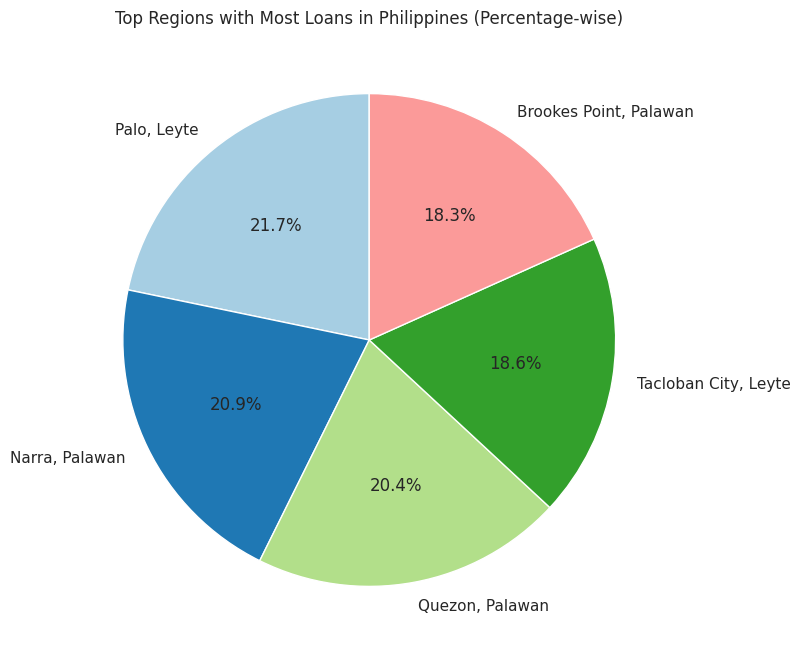

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_regions, labels=top_regions.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top Regions with Most Loans in {} (Percentage-wise)'.format(top_country))
plt.show()

# Insight 8 : Below given are the regions with the most number of loans from the most funded country which also has the highest number of loans (Phillipines)

Regions               : Number of Loans
- Palo, Leyte :               3320
- Narra, Palawan :            3197
- Quezon, Palawan :           3120
- Tacloban City, Leyte :      2843
- Brookes Point, Palawan :    2793

# 4.Repayment Intervals for the countries with the Highest loan amounts

In [ ]:
# Calculate the total loan amount for each country
total_loan_amounts = filtered_kiva_loans.groupby('country')['loan_amount'].sum().sort_values(ascending = False)
total_loan_amounts


country
Philippines    55342225.0
Kenya          34534300.0
Peru           30867400.0
Paraguay       29629075.0
El Salvador    26603650.0
Name: loan_amount, dtype: float64

In [ ]:
filtered_kiva_loans['country'].unique()

array(['Kenya', 'El Salvador', 'Philippines', 'Peru', 'Paraguay'],
      dtype=object)

In [ ]:
total_loan_amounts.index

Index(['Philippines', 'Kenya', 'Peru', 'Paraguay', 'El Salvador'], dtype='object', name='country')

In [ ]:
# Select the top countries with the highest total loan amount
top_countries = total_loan_amounts.index

# Filter the DataFrame for loans from the top countries
filtered_top_countries_loans = filtered_kiva_loans[filtered_kiva_loans['country'].isin(top_countries)]

filtered_top_countries_loans['country'].unique()

array(['Kenya', 'El Salvador', 'Philippines', 'Peru', 'Paraguay'],
      dtype=object)

In [ ]:
filtered_top_countries_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [ ]:
# Create a DataFrame with the cross-tabulation for repayment intervals and countries
cross_tab = pd.crosstab(filtered_top_countries_loans['repayment_interval'], filtered_top_countries_loans['country'])
cross_tab

country,El Salvador,Kenya,Paraguay,Peru,Philippines
repayment_interval,,,,,
bullet,8185,9567,0,2735,1748
irregular,1926,19426,5344,7455,144954
monthly,29764,46230,6559,12043,13739
weekly,0,602,0,0,0


# Insight 9 : Based on the repayment intervals obtained for the top 5 countries with the highest funded amount, we can conclude that kenya has the highest number of monthly & weekly repayment interval. Even though Philippines is the country with the highest fund amount & number of loans, it has a very low number of monthly & weekly repayment intervals.

# Insight 10 : Kenya is the only country from the top 5 most funded countries which makes weekly payments too.

In [ ]:
# Normalize the values to show percentages
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
# cross_tab.sum(axis=1): Calculates the sum of values along axis 1 (i.e., sum of values for each row). In the context of the cross-tabulation DataFrame, this gives the total count of occurrences for each repayment interval.

# cross_tab.div(cross_tab.sum(axis=1), axis=0): Divides each element in the cross_tab DataFrame by the corresponding sum calculated in step 1. This normalization ensures that each row now represents the percentage distribution of repayment intervals for each country.

# * 100: Multiplies the result by 100 to convert the proportions to percentages.
cross_tab_percentage

country,El Salvador,Kenya,Paraguay,Peru,Philippines
repayment_interval,,,,,
bullet,36.811333,43.026760,0.000000,12.300427,7.861480
irregular,1.075347,10.846152,2.983725,4.162363,80.932414
monthly,27.474039,42.673190,6.054368,11.116444,12.681959
weekly,0.000000,100.000000,0.000000,0.000000,0.000000


<Figure size 1500x600 with 0 Axes>

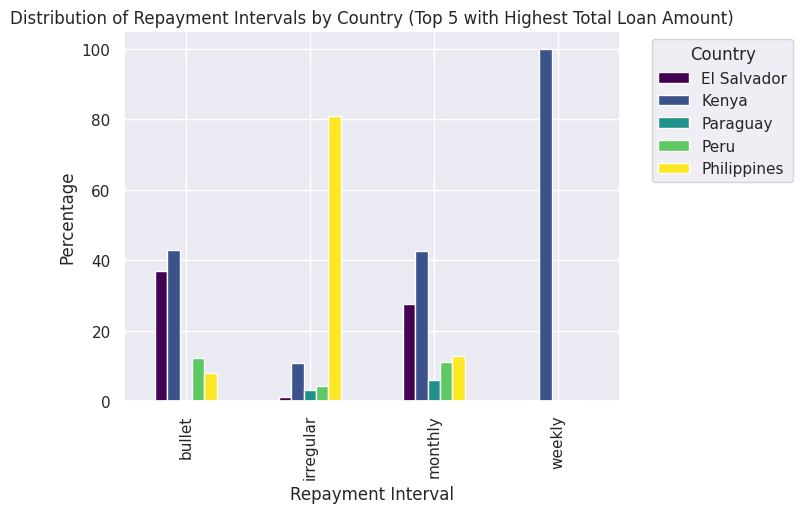

In [ ]:
# Plot a stacked bar chart
plt.figure(figsize=(15, 6))
cross_tab_percentage.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Distribution of Repayment Intervals by Country (Top 5 with Highest Total Loan Amount)')
plt.xlabel('Repayment Interval')
plt.ylabel('Percentage')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. As Kenya is the country with the second highest number of loans & the second highest loan amount & it is also the country with the highest monthly & weekly repayment interval, our further analysis would focus only on Kenya

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

In [ ]:
kenya_loans['country'].unique()

array(['Kenya'], dtype=object)

In [ ]:
# Calculate the percentage-wise distribution of repayment intervals in Kenya
repayment_distribution = kenya_loans['repayment_interval'].value_counts(normalize=True) * 100

In [ ]:
kenya_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [ ]:
kenya_loans['country'].unique()

array(['Kenya'], dtype=object)

In [ ]:
kenya_loans_grouped_by_repayment = kenya_loans.groupby('repayment_interval')

In [ ]:
kenya_loans_grouped_by_repayment['repayment_interval'].value_counts()

repayment_interval  repayment_interval
bullet              bullet                 9567
irregular           irregular             19426
monthly             monthly               46230
weekly              weekly                  602
Name: repayment_interval, dtype: int64

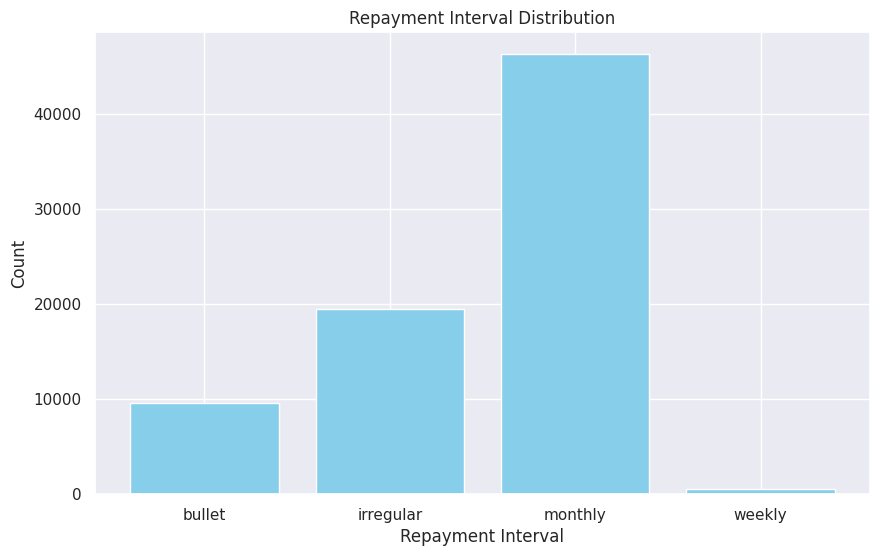

In [ ]:
# Given information
repayment_interval_counts = {
    'bullet': 9567,
    'irregular': 19426,
    'monthly': 46230,
    'weekly': 602
}

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(repayment_interval_counts.keys(), repayment_interval_counts.values(), color='skyblue')
plt.title('Repayment Interval Distribution')
plt.xlabel('Repayment Interval')
plt.ylabel('Count')
plt.show()



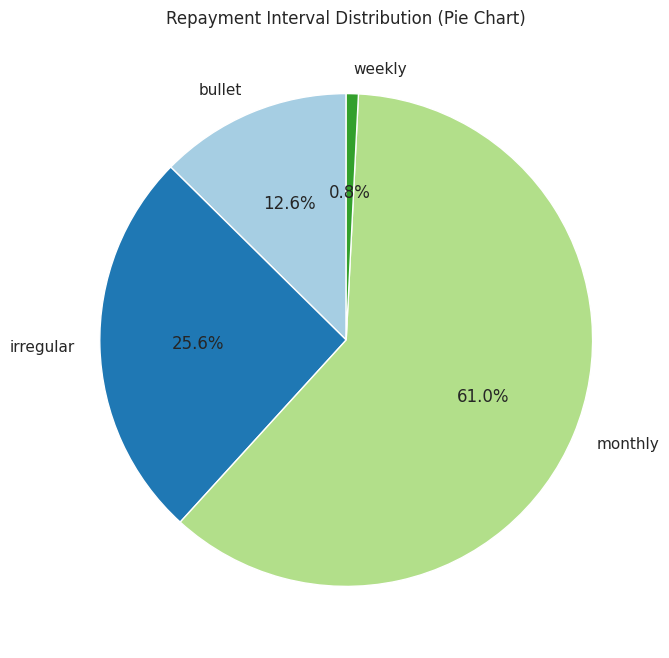

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_interval_counts.values(), labels=repayment_interval_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Interval Distribution (Pie Chart)')
plt.show()

In [ ]:
repayment_distribution

monthly      60.969337
irregular    25.619519
bullet       12.617211
weekly        0.793933
Name: repayment_interval, dtype: float64

# Insight 11 : Most of the borrowers from Kenya prefer a monthly repayment interval. 60.96 % (61 %) of the borrowers from kenya are opting for monthly repayment interval

## Repayment intervals distribution for Philippines

In [ ]:
# Filter the DataFrame for loans from Philippines
philippines_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Philippines']

In [ ]:
philippines_loans_grouped_by_repayment = philippines_loans.groupby('repayment_interval')

In [ ]:
philippines_loans_grouped_by_repayment['repayment_interval'].value_counts()

repayment_interval  repayment_interval
bullet              bullet                  1748
irregular           irregular             144954
monthly             monthly                13739
Name: repayment_interval, dtype: int64

In [ ]:
# Calculate the percentage-wise distribution of repayment intervals in Philippines
repayment_distribution = philippines_loans['repayment_interval'].value_counts(normalize=True) * 100

In [ ]:
repayment_distribution

irregular    90.347230
monthly       8.563272
bullet        1.089497
Name: repayment_interval, dtype: float64

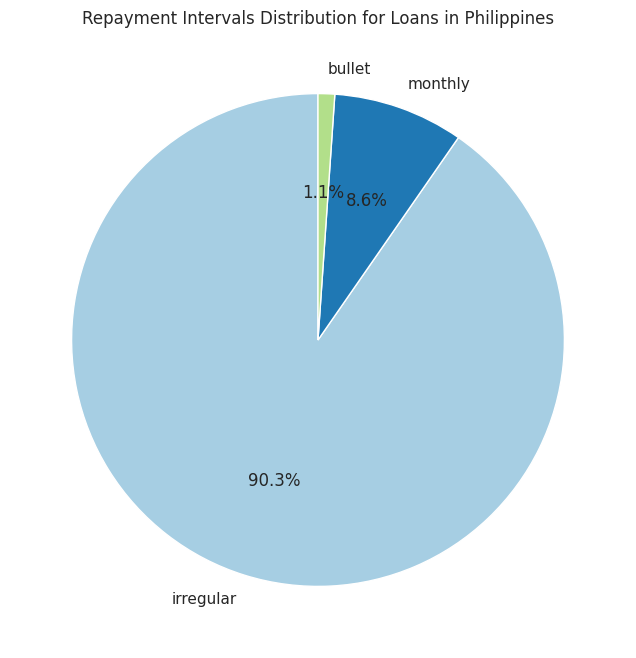

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_distribution, labels=repayment_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals Distribution for Loans in Philippines')
plt.show()

# Insight 12 : Most of the borrowers from philippines have a irregular repayment interval. 90.34 % (90 %) of the borrowers from  philippines have a irregular repayment interval

In [ ]:
# Filter the DataFrame for loans from Peru
peru_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Peru']

In [ ]:
# Calculate the percentage-wise distribution of repayment intervals in Peru
repayment_distribution = peru_loans['repayment_interval'].value_counts(normalize=True) * 100

In [ ]:
repayment_distribution

monthly      54.167229
irregular    33.531237
bullet       12.301534
Name: repayment_interval, dtype: float64

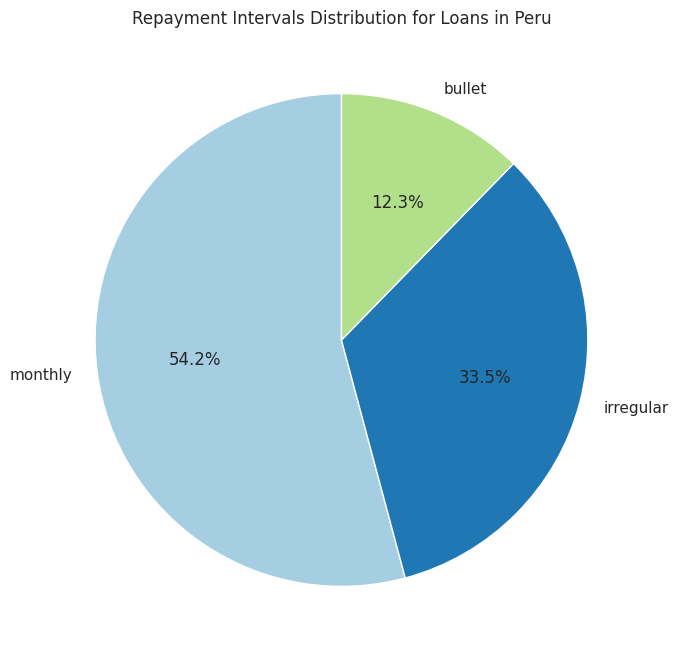

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_distribution, labels=repayment_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals Distribution for Loans in Peru')
plt.show()

# Insight 13 : Most of the borrowers from Peru have a monthly repayment interval. 90.34 % (90 %) of the borrowers from  Peru have a monthly repayment interval

In [ ]:
top_countries

Index(['Philippines', 'Kenya', 'Peru', 'Paraguay', 'El Salvador'], dtype='object', name='country')

In [ ]:
# Filter the DataFrame for loans from Paraguay
paraguay_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Paraguay']

In [ ]:
# Calculate the percentage-wise distribution of repayment intervals in Paraguay
repayment_distribution = paraguay_loans['repayment_interval'].value_counts(normalize=True) * 100

In [ ]:
repayment_distribution

monthly      55.103755
irregular    44.896245
Name: repayment_interval, dtype: float64

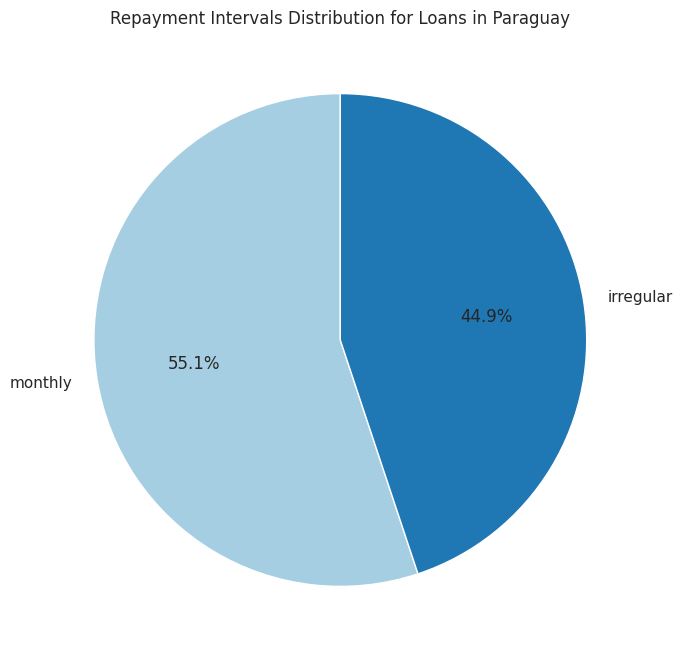

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_distribution, labels=repayment_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals Distribution for Loans in Paraguay')
plt.show()

# Insight 14 : Most of the borrowers from Paraguay have a monthly repayment interval. 55.10 % (55.1 %) of the borrowers from  Paraguay have a monthly repayment interval

In [ ]:
# Filter the DataFrame for loans from el_salvador
el_salvador_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'El Salvador']

In [ ]:
# Calculate the percentage-wise distribution of repayment intervals in Paraguay
repayment_distribution = el_salvador_loans['repayment_interval'].value_counts(normalize=True) * 100

In [ ]:
repayment_distribution

monthly      74.643260
bullet       20.526646
irregular     4.830094
Name: repayment_interval, dtype: float64

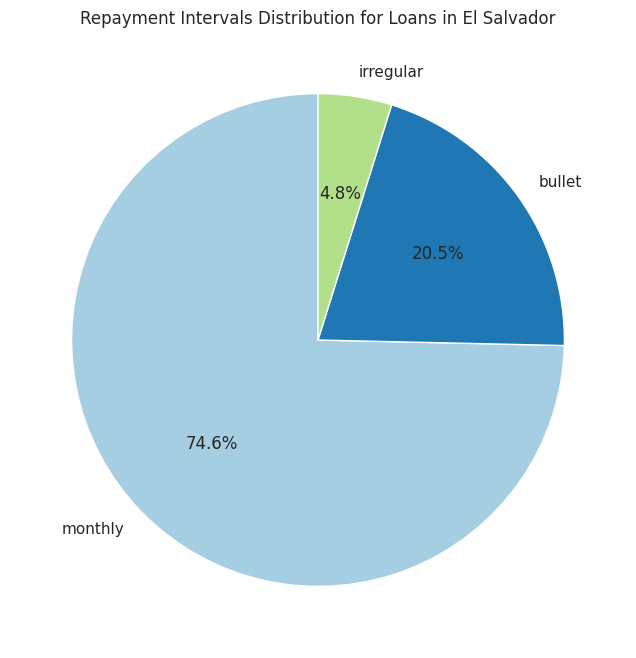

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_distribution, labels=repayment_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals Distribution for Loans in El Salvador')
plt.show()

# Insight 15 : Most of the borrowers from El salvador have a monthly repayment interval. 74.64 % (74.6 %) of the borrowers from  El salvador have a monthly repayment interval

In [ ]:
# Filter the DataFrame for loans with regular repayment intervals
regular_payments = kiva_loans[kiva_loans['repayment_interval'] == 'monthly']

# Find the country with the highest number of regular repayment intervals
country_highest_regular_payments = regular_payments['country'].value_counts().idxmax()

# Display the result
print("Country with the Highest Number of Regular Payment Intervals: {}".format(country_highest_regular_payments))

Country with the Highest Number of Regular Payment Intervals: Kenya


In [ ]:
# Filter the DataFrame for loans with regular repayment intervals
irregular_payments = kiva_loans[kiva_loans['repayment_interval'] == 'irregular']

# Find the country with the highest number of regular repayment intervals
country_highest_irregular_payments = irregular_payments['country'].value_counts().idxmax()

# Display the result
print("Country with the Highest Number of Irregular Payment Intervals: {}".format(country_highest_irregular_payments))

Country with the Highest Number of Irregular Payment Intervals: Philippines


# Insight 16 : The country with the highest monthly regular repayment interval is Kenya among the 87 countries for which we have the data. The country with the highest irregular repayment interval is Philippines among the 87 countries for which we have the data.

### Top 3 countries with regular payment intervals among the countries with the highest loan amounts

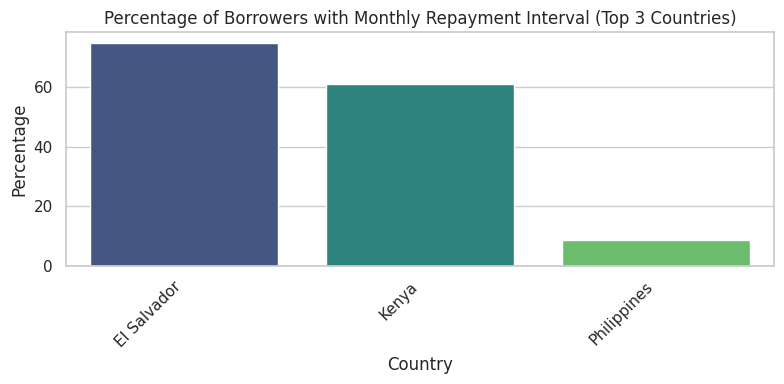

In [ ]:
# Filter the dataset for regular payments
regular_payment_countries = filtered_kiva_loans[filtered_kiva_loans['repayment_interval'] == 'monthly']

# Get the top 3 countries with regular payments
top_countries = regular_payment_countries['country'].value_counts().head(3).index

# Filter the dataset for these top 3 countries
top_countries_data = filtered_kiva_loans[filtered_kiva_loans['country'].isin(top_countries)]

# Calculate percentage distribution
percentage_distribution = (top_countries_data.groupby('country')['repayment_interval'].apply(lambda x: (x == 'monthly').mean()) * 100).reset_index()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart using sns.barplot
plt.figure(figsize=(8, 4))
sns.barplot(x='country', y='repayment_interval', data=percentage_distribution, palette='viridis')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Percentage of Borrowers with Monthly Repayment Interval (Top 3 Countries)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Insight 17 : Among the countries that have taken the highest loan amount, El salvador, Kenya & Philippines are the top 3 countries with the highest monthly repayment interval.

# Insight 18 : Kenya is second & El Salvador is fifth in the list of countries with the highest loan amounts. But El salvador has a higher percentage (74.64 %) of borrowers with monthly repayment interval out of the country's total number of borrowers. Kenya has 60.96 % of borrowers with monthly repayment interval out of the country's total number of borrowers.

# 6. Let's analyse El Salvador & Kenya both as they both have the highest number of borrowers with monthly repayment interval

# 6.a) Let's start with Kenya

## Top Sectors with Most number of Loans from Kenya


In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Get the top sectors with the most number of loans
top_sectors = kenya_loans['sector'].value_counts().head()

In [ ]:
top_sectors

Agriculture    33644
Food           14072
Retail         10185
Services        5460
Clothing        4753
Name: sector, dtype: int64

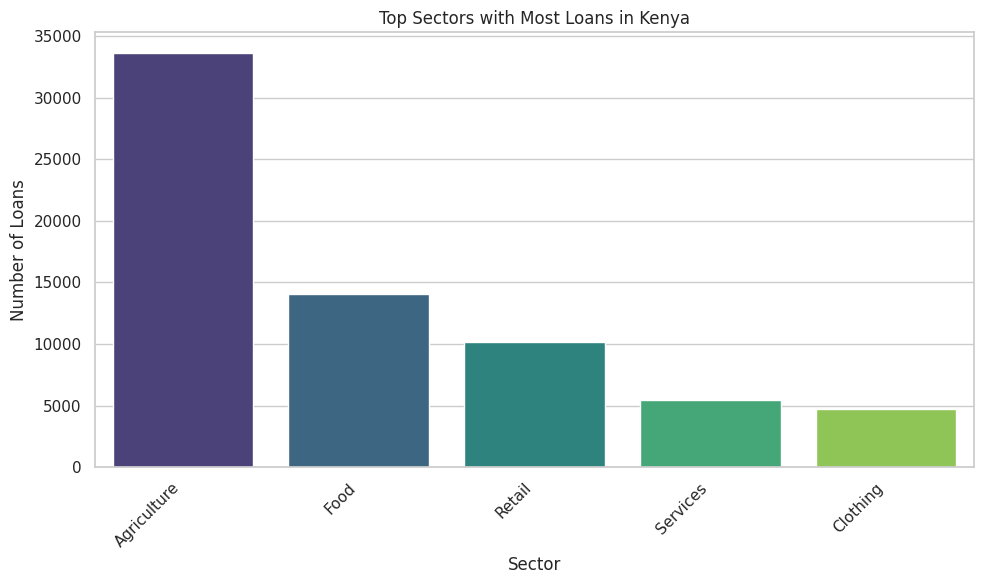

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Loans')
plt.title('Top Sectors with Most Loans in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 19 : Agriculture, Food & Retails are the sectors with the most number of loans in Kenya

- Agriculture :   33644
- Food :          14072
- Retail :        10185

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = kiva_loans[kiva_loans['country'] == 'Kenya']

# Calculate the total loan amount for each sector in Kenya
sector_loan_amounts = kenya_loans.groupby('sector')['funded_amount'].sum().sort_values(ascending=False).head()

sector_loan_amounts


sector
Agriculture    16484185.0
Food            4603345.0
Retail          4232640.0
Services        1896535.0
Clothing        1547850.0
Name: funded_amount, dtype: float64

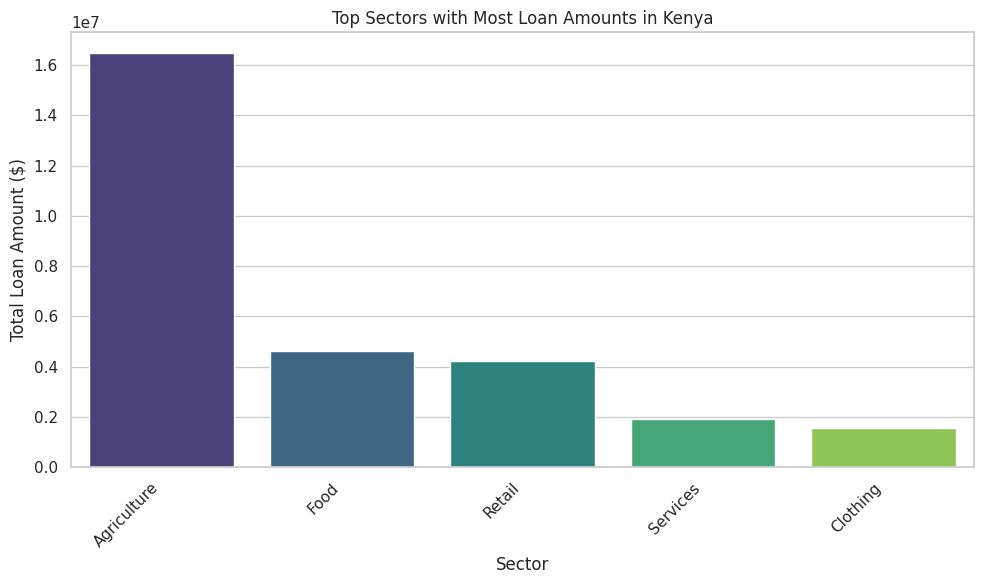

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_loan_amounts.index, y=sector_loan_amounts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Total Loan Amount ($)')
plt.title('Top Sectors with Most Loan Amounts in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 19 : Agriculture, Food & Retail are also the sectors with the Highest Loan Amounts in Kenya

- Agriculture :   16484185.0
- Food :          4603345.0
- Retail :        4232640.0

### Top regions with most number of loans & highest loan amounts in Kenya

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Calculate the top regions with the most number of loans
top_regions_loans = kenya_loans['region'].value_counts().head()

# Calculate the top regions with the most loan amounts
top_regions_loan_amounts = kenya_loans.groupby('region')['funded_amount'].sum().sort_values(ascending=False).head()


In [ ]:
top_regions_loans

Kisii      3546
Kitale     3104
Eldoret    2750
Webuye     2513
Kisumu     2324
Name: region, dtype: int64

# Insight 20 : Kisii is the region with the highest number of loans from Kenya

- Kisii :     3546
- Kitale :    3104
- Eldoret :   2750

In [ ]:
top_regions_loan_amounts

region
Webuye     1990025.0
Nairobi    1181000.0
Teso       1169275.0
Kitale     1157550.0
Eldoret    1046300.0
Name: funded_amount, dtype: float64

# Insight 21 : Webuye is the region with the highest loan amount from Kenya

- Webuye :    1990025.0
- Nairobi :   1181000.0
- Teso :      1169275.0

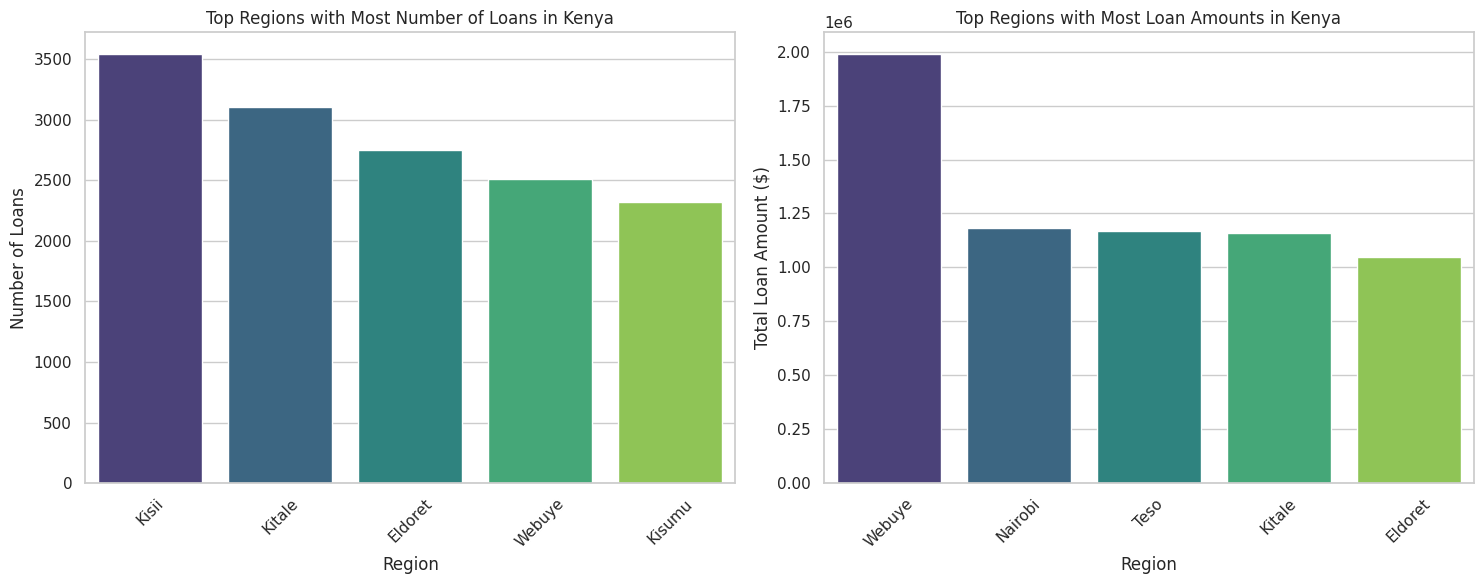

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create subplots for the two charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the top regions by number of loans
sns.barplot(x=top_regions_loans.index, y=top_regions_loans.values, palette='viridis', ax=axes[0])
axes[0].set_title('Top Regions with Most Number of Loans in Kenya')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Number of Loans')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the top regions by loan amounts
sns.barplot(x=top_regions_loan_amounts.index, y=top_regions_loan_amounts.values, palette='viridis', ax=axes[1])
axes[1].set_title('Top Regions with Most Loan Amounts in Kenya')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Loan Amount ($)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Insight 22 : Webuye, Kitale & Eldoret are the three regions from Kenya that are in the top 5 regions with the highest loan amount & the highest number of loans from Kenya

## Repayment intervals for Regions with the most loans & the regions with the highest loan amounts in Kenya

In [ ]:
# Find the repayment intervals for the regions with the most loans
repayment_intervals_most_loans = kenya_loans[kenya_loans['region'].isin(top_regions_loans.index)]['repayment_interval'].value_counts()

# Find the repayment intervals for the regions with the highest loan amounts
repayment_intervals_highest_loan_amounts = kenya_loans[kenya_loans['region'].isin(top_regions_loan_amounts.index)]['repayment_interval'].value_counts()


In [ ]:
repayment_intervals_most_loans

monthly      10399
bullet        2705
irregular     1133
Name: repayment_interval, dtype: int64

In [ ]:
repayment_intervals_highest_loan_amounts

monthly      5595
bullet       4278
irregular     680
Name: repayment_interval, dtype: int64

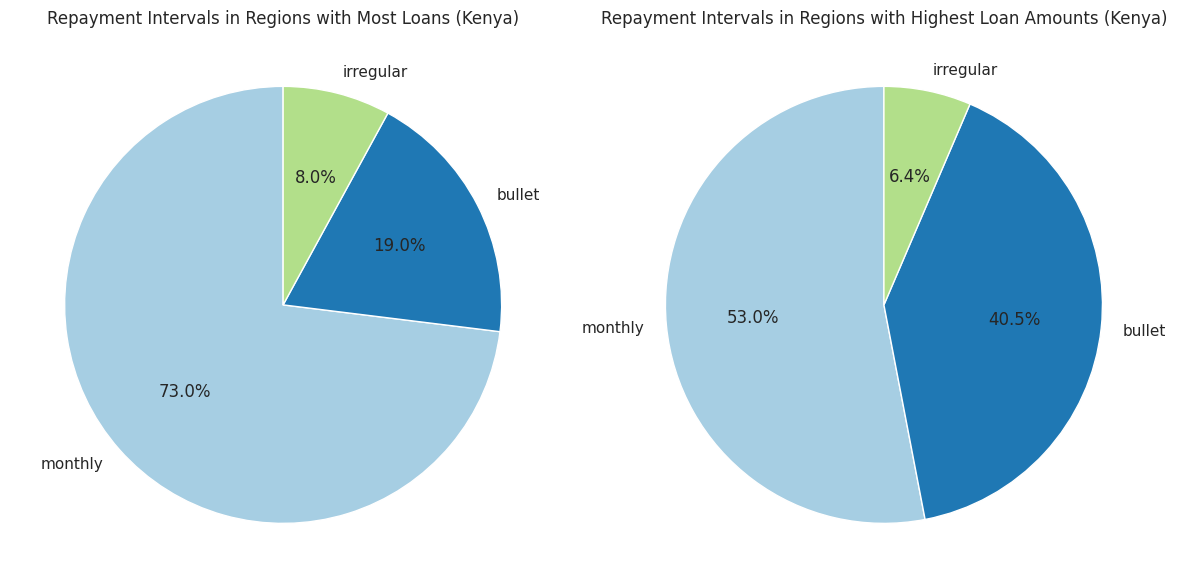

In [ ]:
# Plot pie chart for repayment intervals in regions with the most loans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(repayment_intervals_most_loans, labels=repayment_intervals_most_loans.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals in Regions with Most Loans (Kenya)')

# Plot pie chart for repayment intervals in regions with the highest loan amounts
plt.subplot(1, 2, 2)
plt.pie(repayment_intervals_highest_loan_amounts, labels=repayment_intervals_highest_loan_amounts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals in Regions with Highest Loan Amounts (Kenya)')

plt.tight_layout()
plt.show()

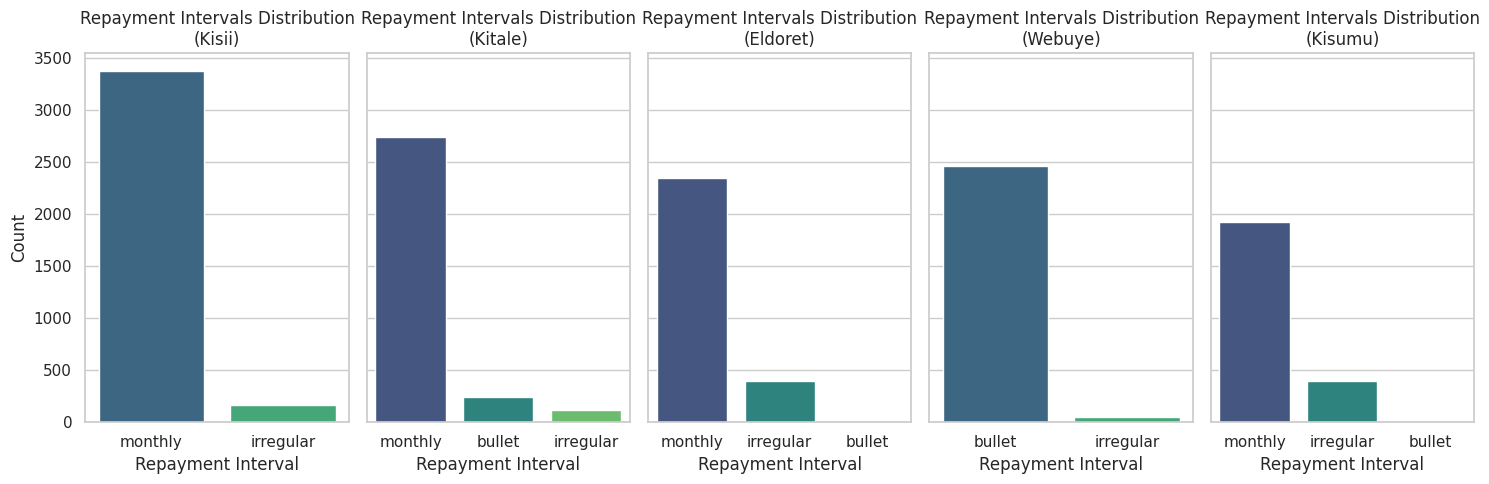

In [ ]:
# List of specified regions
specified_regions = ['Kisii', 'Kitale', 'Eldoret', 'Webuye', 'Kisumu']

# Create subplots for each region
fig, axes = plt.subplots(nrows=1, ncols=len(specified_regions), figsize=(15, 5), sharey=True)

# Iterate over each region and plot the repayment intervals distribution
for i, region in enumerate(specified_regions):
    region_loans = kenya_loans[kenya_loans['region'] == region]
    repayment_intervals_distribution = region_loans['repayment_interval'].value_counts()

    # Bar plot for repayment intervals distribution in each region
    sns.barplot(x=repayment_intervals_distribution.index, y=repayment_intervals_distribution.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Repayment Intervals Distribution\n({region})')
    axes[i].set_xlabel('Repayment Interval')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Stacking the bars for each region from the regions with the most number of loans

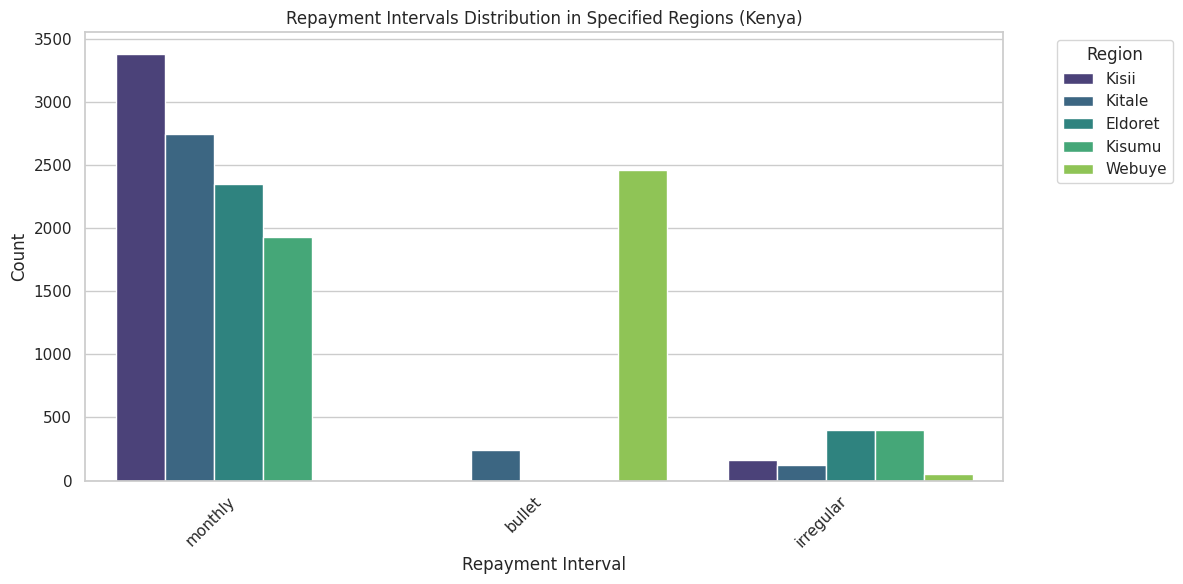

In [ ]:
# List of specified regions
specified_regions = ['Kisii', 'Kitale', 'Eldoret', 'Webuye', 'Kisumu']

# Create a DataFrame with the specified regions
specified_regions_loans = kenya_loans[kenya_loans['region'].isin(specified_regions)]

# Plot a stacked bar graph for repayment intervals in all specified regions
plt.figure(figsize=(12, 6))
sns.countplot(x='repayment_interval', hue='region', data=specified_regions_loans, palette='viridis')

# Set labels and title
plt.xlabel('Repayment Interval')
plt.ylabel('Count')
plt.title('Repayment Intervals Distribution in Specified Regions (Kenya)')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


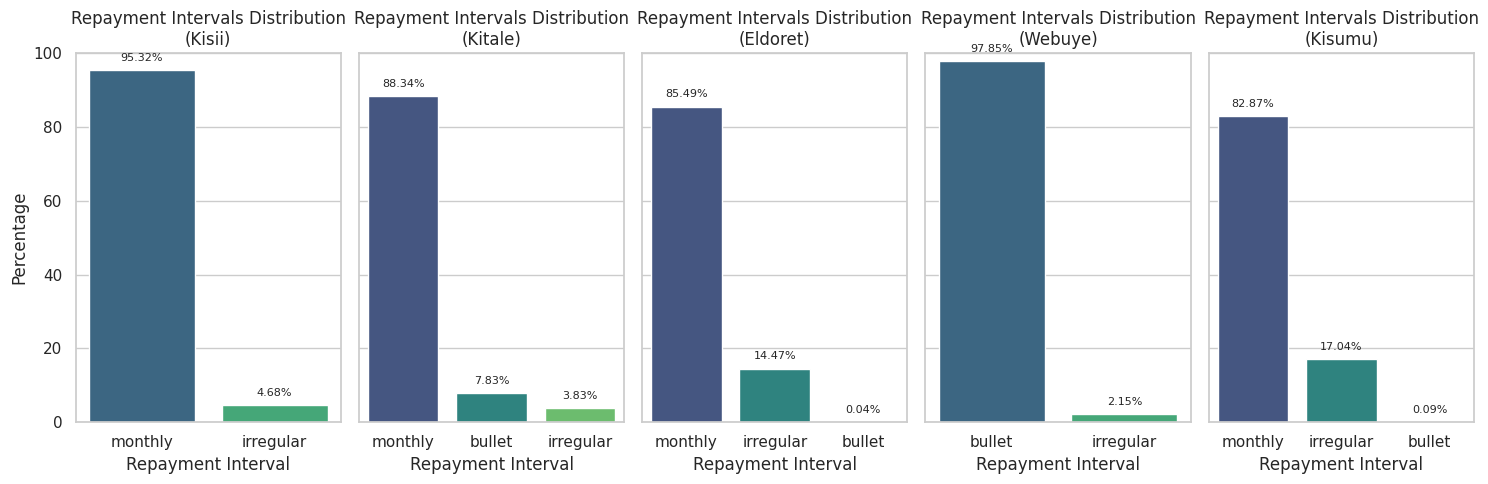

In [ ]:
# List of specified regions
specified_regions = ['Kisii', 'Kitale', 'Eldoret', 'Webuye', 'Kisumu']

# Create subplots for each region
fig, axes = plt.subplots(nrows=1, ncols=len(specified_regions), figsize=(15, 5), sharey=True)

# Iterate over each region and plot the repayment intervals distribution
for i, region in enumerate(specified_regions):
    region_loans = kenya_loans[kenya_loans['region'] == region]
    total_loans_in_region = len(region_loans)
    repayment_intervals_distribution = region_loans['repayment_interval'].value_counts(normalize=True) * 100

    # Bar plot for repayment intervals distribution in each region
    sns.barplot(x=repayment_intervals_distribution.index, y=repayment_intervals_distribution.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Repayment Intervals Distribution\n({region})')
    axes[i].set_xlabel('Repayment Interval')
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 100 for percentages

    # Display percentages on top of each bar
    for index, value in enumerate(repayment_intervals_distribution):
        axes[i].text(index, value + 2, f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# Insight 23 : Kisii is the region from Kenya among the regions with the highest number of loans from Kenya that has the highest monthly repayment interval rate. Kisumu is the region from Kenya among the regions with the highest number of loans from Kenya that has the lowest monthly repayment interval rate. None of the borrowers prefer a weekly repayment interval from any of these regions

## Popular sectors in Kisii (The region with the highest number of loans) in Kenya

In [ ]:
# Filter the DataFrame for loans from the top region
top_region_loans = kiva_loans[kiva_loans['region'] == "Kisii"]

# Calculate the most popular sectors in the top region
top_sector_counts = top_region_loans['sector'].value_counts().head()

# Calculate the sectors with the most loan amounts
top_sectors_loan_amounts = top_region_loans.groupby('sector')['funded_amount'].sum().sort_values(ascending=False).head()


In [ ]:
top_sector_counts

Agriculture       2406
Food               336
Retail             272
Transportation     165
Services           151
Name: sector, dtype: int64

In [ ]:
top_sectors_loan_amounts

sector
Agriculture       684675.0
Food               93975.0
Retail             78400.0
Services           44950.0
Transportation     42525.0
Name: funded_amount, dtype: float64

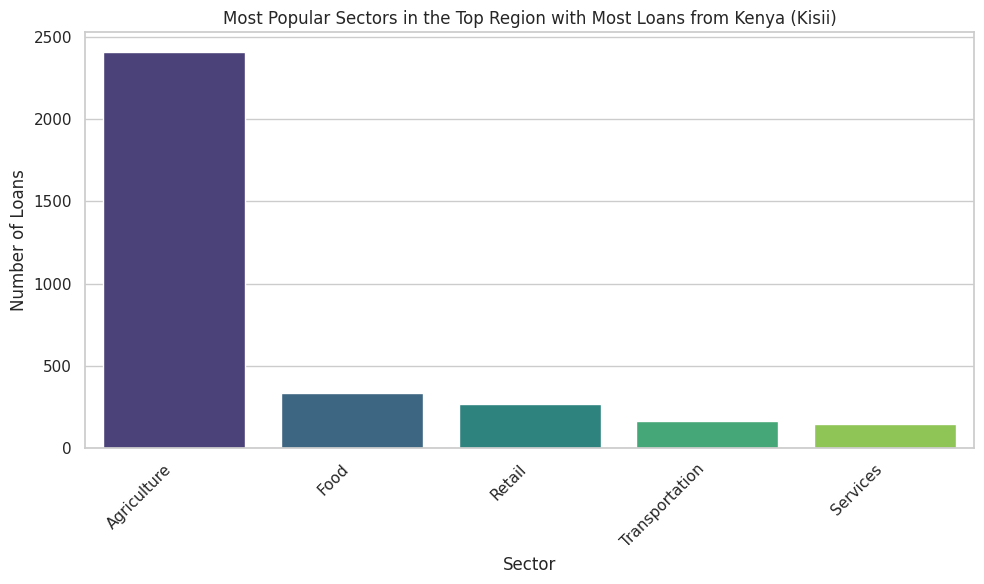

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sector_counts.index, y=top_sector_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Loans')
plt.title('Most Popular Sectors in the Top Region with Most Loans from Kenya (Kisii)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

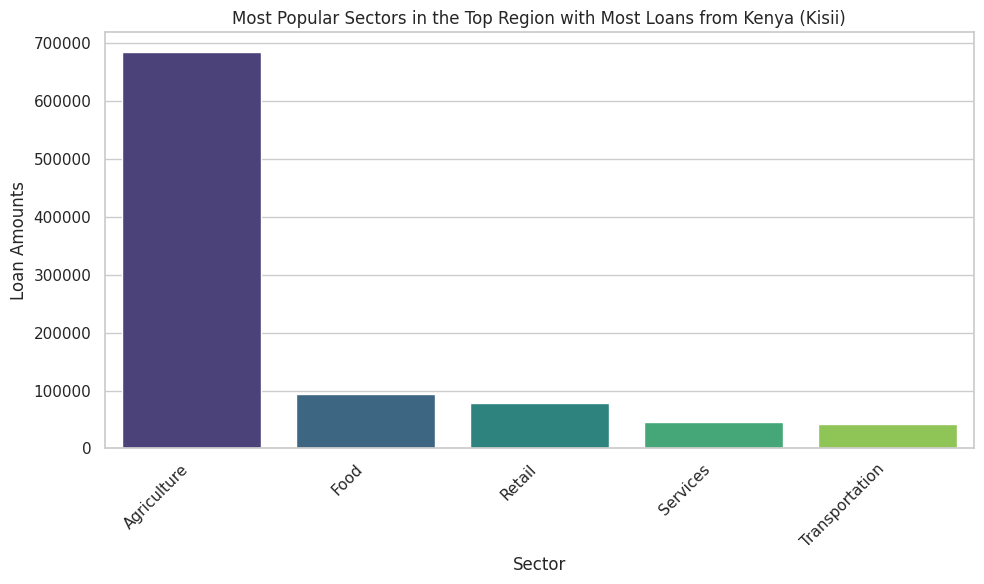

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors_loan_amounts.index, y=top_sectors_loan_amounts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Loan Amounts')
plt.title('Most Popular Sectors in the Top Region with Most Loans from Kenya (Kisii)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame for loans from the top region
top_region_loans = kiva_loans[kiva_loans['region'] == "Webuye"]

# Find the repayment intervals of borrowers in the top region
repayment_intervals = top_region_loans['repayment_interval'].value_counts()

# Display the result
print("Repayment Intervals in Webuye:")
print(repayment_intervals)


Repayment Intervals in Webuye:
bullet       2459
irregular      54
Name: repayment_interval, dtype: int64


# Insight 24 : Agriculture, Food & Retail are the top 3 sectors with the most number of loans in Kisii (The region with the most number of loans in Kenya)

- Agriculture :      2406
- Food :              336
- Retail :            272

# Insight 25 : Agriculture, Food & Retail are the top 3 sectors with the Highest Loan Amounts in Kisii (The region with the most number of loans in Kenya)

- Agriculture :      684675.0
- Food :              93975.0
- Retail :            78400.0

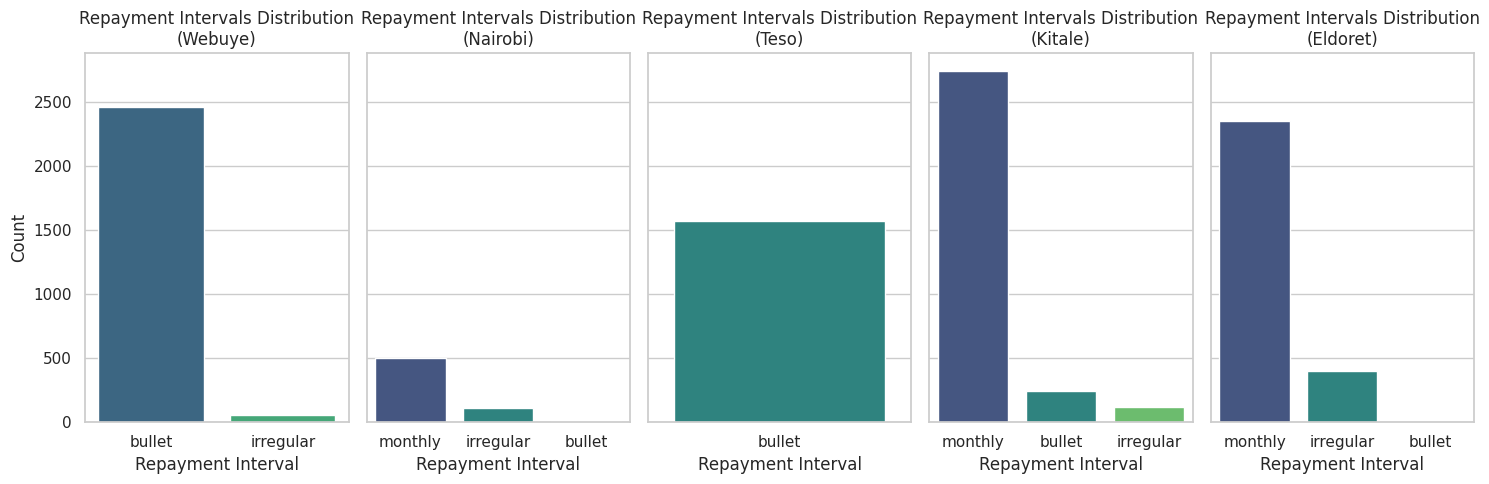

In [ ]:
# List of specified regions
specified_regions = ['Webuye', 'Nairobi', 'Teso', 'Kitale', 'Eldoret']

# Create subplots for each region
fig, axes = plt.subplots(nrows=1, ncols=len(specified_regions), figsize=(15, 5), sharey=True)

# Iterate over each region and plot the repayment intervals distribution
for i, region in enumerate(specified_regions):
    region_loans = kenya_loans[kenya_loans['region'] == region]
    repayment_intervals_distribution = region_loans['repayment_interval'].value_counts()

    # Bar plot for repayment intervals distribution in each region
    sns.barplot(x=repayment_intervals_distribution.index, y=repayment_intervals_distribution.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Repayment Intervals Distribution\n({region})')
    axes[i].set_xlabel('Repayment Interval')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


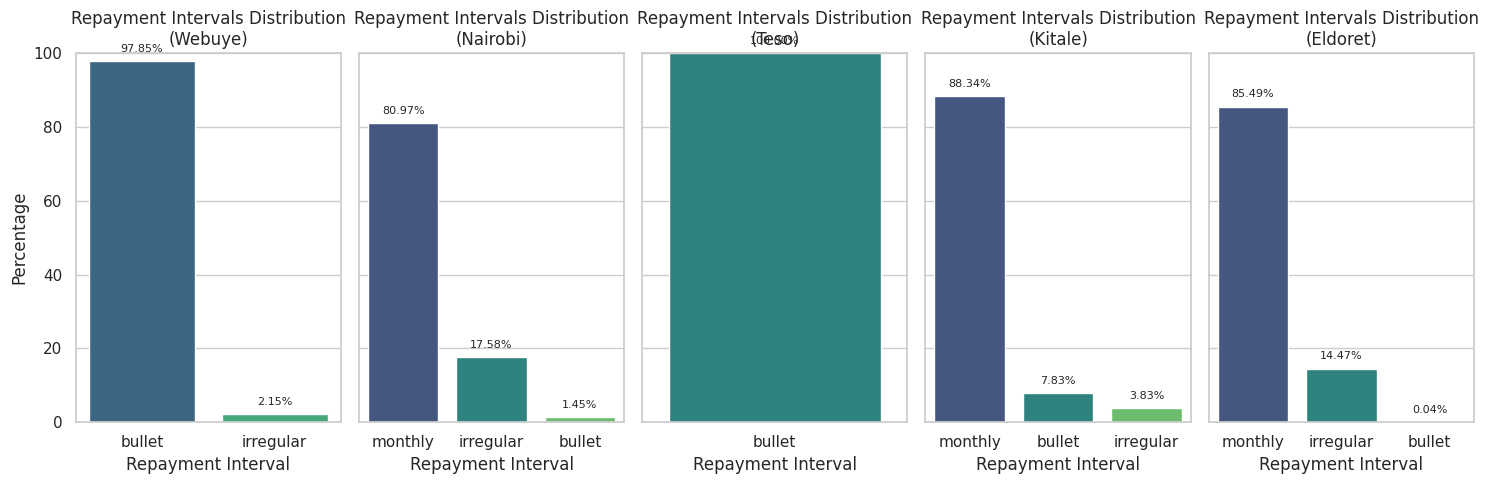

In [ ]:
# List of specified regions
specified_regions = ['Webuye', 'Nairobi', 'Teso', 'Kitale', 'Eldoret']

# Create subplots for each region
fig, axes = plt.subplots(nrows=1, ncols=len(specified_regions), figsize=(15, 5), sharey=True)

# Iterate over each region and plot the repayment intervals distribution
for i, region in enumerate(specified_regions):
    region_loans = kenya_loans[kenya_loans['region'] == region]
    total_loans_in_region = len(region_loans)
    repayment_intervals_distribution = region_loans['repayment_interval'].value_counts(normalize=True) * 100

    # Bar plot for repayment intervals distribution in each region
    sns.barplot(x=repayment_intervals_distribution.index, y=repayment_intervals_distribution.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Repayment Intervals Distribution\n({region})')
    axes[i].set_xlabel('Repayment Interval')
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 100 for percentages

    # Display percentages on top of each bar
    for index, value in enumerate(repayment_intervals_distribution):
        axes[i].text(index, value + 2, f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Insight 26 : Kitale is the region from Kenya among the regions with the highest loan amounts from Kenya that has the highest monthly repayment interval rate. Webuye is the region from Kenya among the regions with the highest loan amounts from Kenya that has the highest bullet repayment interval rate. None of the borrowers prefer a weekly repayment interval from any of these regions

# Insight 27 : Kitale is the region that has the second highest number of loans & the fourth highest loan amount & it also has the second highest monthly repayment interval rate. This is the best region to target for crowdfunding from Kenya which is one of the best country besides El Salvador to target for crowdfunding.

## Popular sectors in Webuye (The region with the highest loan amount) in Kenya

In [ ]:
# Filter the DataFrame for loans from the top region
top_region_loans = kiva_loans[kiva_loans['region'] == "Webuye"]

# Calculate the most popular sectors in the top region
top_sector_counts = top_region_loans['sector'].value_counts().head()

# Calculate the sectors with the most loan amounts
top_sectors_loan_amounts = top_region_loans.groupby('sector')['funded_amount'].sum().sort_values(ascending=False).head()


In [ ]:
top_sector_counts

Agriculture    2462
Retail           17
Food             11
Clothing          8
Services          6
Name: sector, dtype: int64

In [ ]:
top_sectors_loan_amounts

sector
Agriculture    1969850.0
Retail            5750.0
Clothing          3750.0
Food              3725.0
Services          3100.0
Name: funded_amount, dtype: float64

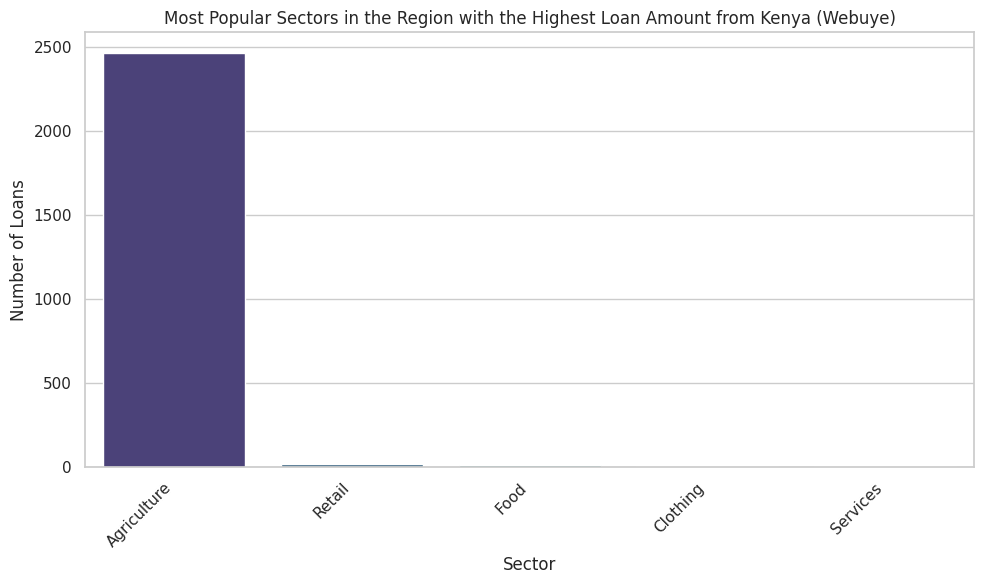

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sector_counts.index, y=top_sector_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Loans')
plt.title('Most Popular Sectors in the Region with the Highest Loan Amount from Kenya (Webuye)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

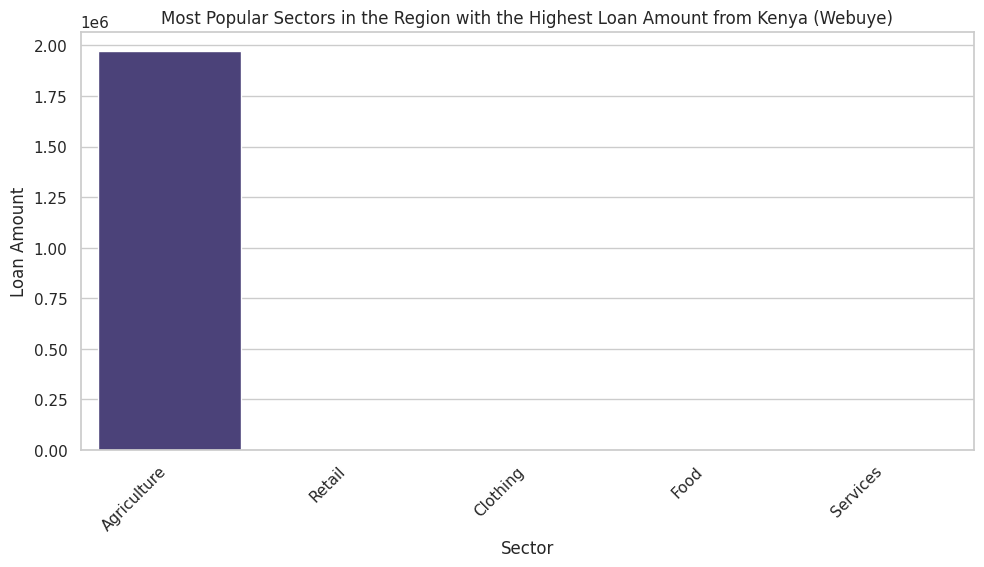

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors_loan_amounts.index, y=top_sectors_loan_amounts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.title('Most Popular Sectors in the Region with the Highest Loan Amount from Kenya (Webuye)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 28 : Agriculture, Retail & Food are the top 3 sectors with the most number of loans in Webuye (The region with the highest loan amount in Kenya)

- Agriculture :    2462
- Retail :          17
- Food :            11
- Clothing :         8
- Services :         6

# Insight 29 : Agriculture, Retail & Clothing are the top 3 sectors with the Highest Loan Amounts in Webuye (The region with the highest loan amount in Kenya)

- Agriculture :   1969850.0
- Retail :           5750.0
- Clothing :         3750.0





# Popular sectors, activities & uses from Kitale (Best region from Kenya for crowdfunding) for which borrowers from Kitale have taken loans from Kiva.

In [ ]:
# Filter the DataFrame for loans from the top region
top_region_loans = kiva_loans[kiva_loans['region'] == "Kitale"]

# Calculate the most popular sectors in the top region
top_sector_counts = top_region_loans['sector'].value_counts().head()

# Calculate the sectors with the most loan amounts
top_sectors_loan_amounts = top_region_loans.groupby('sector')['funded_amount'].sum().sort_values(ascending=False).head()

In [ ]:
top_sector_counts

Agriculture     2395
Personal Use     282
Food             184
Retail            70
Education         44
Name: sector, dtype: int64

In [ ]:
top_sectors_loan_amounts

sector
Agriculture       963150.0
Food               70700.0
Retail             29100.0
Personal Use       23200.0
Transportation     18850.0
Name: funded_amount, dtype: float64

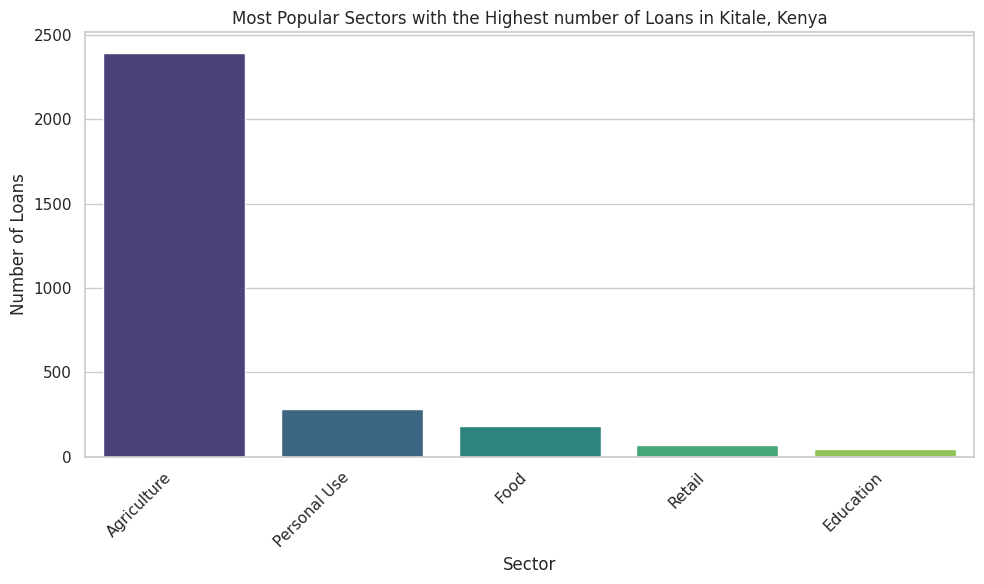

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sector_counts.index, y=top_sector_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Loans')
plt.title('Most Popular Sectors with the Highest number of Loans in Kitale, Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

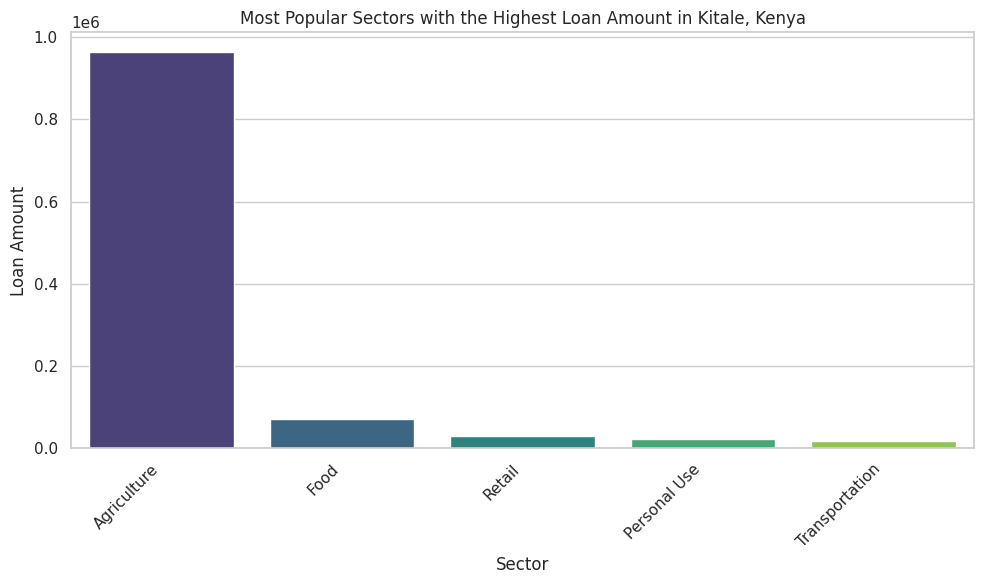

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors_loan_amounts.index, y=top_sectors_loan_amounts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.title('Most Popular Sectors with the Highest Loan Amount in Kitale, Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 30 : Agriculture, Food, Retail & Personal Use are the top 4 sectors with the Highest Loan Amounts & Highest number of loans in Kitale, kenya. Number of loans for personal use is more than food & retail in Kitale but loan amount is less than food & retail in Kitale, Kenya

In [ ]:
# Filter the DataFrame for loans from Kenya
kitale_loans = filtered_kiva_loans[filtered_kiva_loans['region'] == 'Kitale']

# Calculate the top activities with the most number of loans
top_activities = kitale_loans['activity'].value_counts().head()

# Calculate the sectors with the most loan amounts
top_activities_loan_amounts = kitale_loans.groupby('activity')['funded_amount'].sum().sort_values(ascending=False).head()

In [ ]:
top_activities

Farming        1605
Agriculture     340
Home Energy     244
Poultry         221
Dairy           192
Name: activity, dtype: int64

In [ ]:
top_activities_loan_amounts

activity
Farming        639700.0
Agriculture    116050.0
Dairy           97425.0
Poultry         94700.0
Cereals         52825.0
Name: funded_amount, dtype: float64

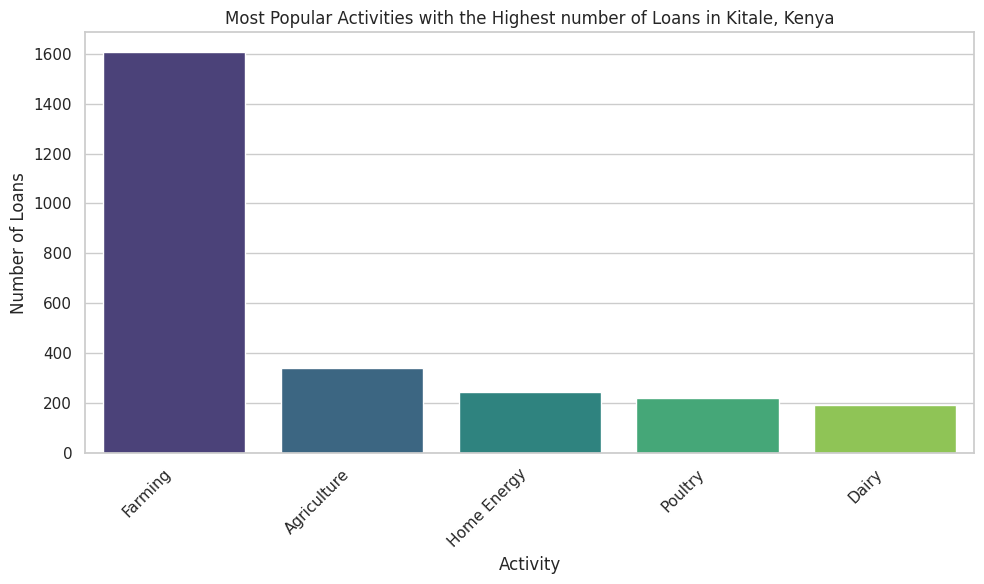

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_activities.index, y=top_activities.values, palette='viridis')

# Set labels and title
plt.xlabel('Activity')
plt.ylabel('Number of Loans')
plt.title('Most Popular Activities with the Highest number of Loans in Kitale, Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

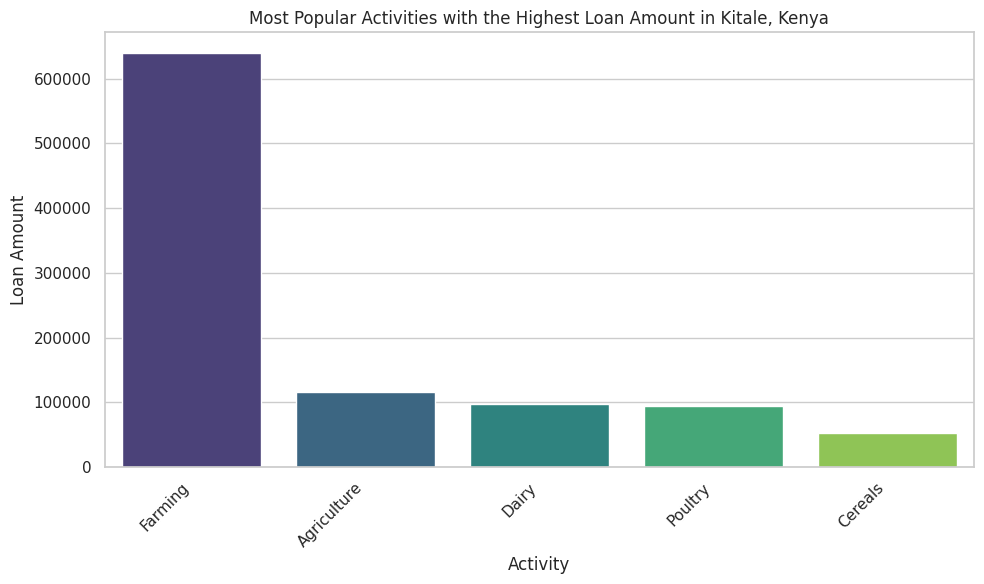

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_activities_loan_amounts.index, y=top_activities_loan_amounts.values, palette='viridis')

# Set labels and title
plt.xlabel('Activity')
plt.ylabel('Loan Amount')
plt.title('Most Popular Activities with the Highest Loan Amount in Kitale, Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 31 : Farming, Agriculture & Dairy are the top 3 activities with the Highest Loan Amounts in Kitale, Kenya.

In [ ]:
filtered_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,2014-01-02 18:40:01+00:00,13.0,7,#Vegan,female,irregular,2014-01-02
49,653418,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,81.0,2014-01-02 22:17:55+00:00,2013-12-21 08:00:00+00:00,2014-01-30 00:19:42+00:00,14.0,18,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02
51,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02


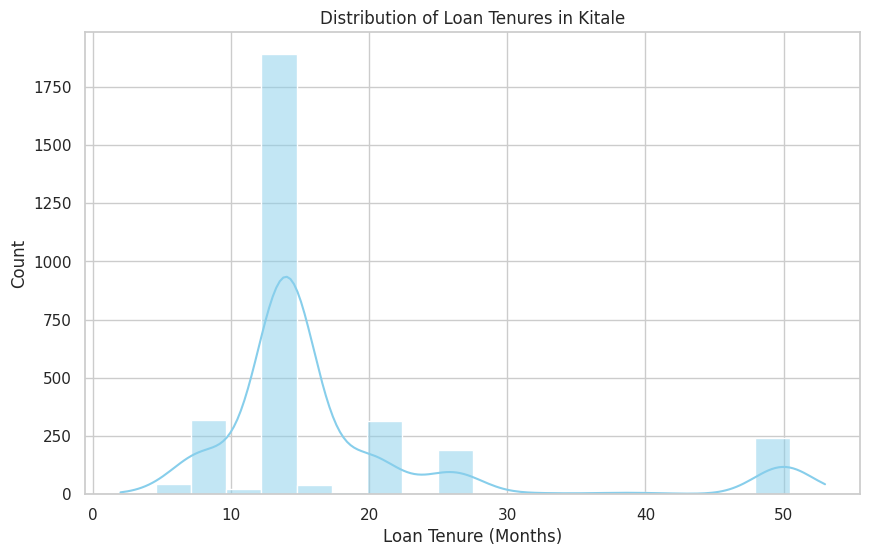

In [ ]:
# Extract rows with 'Kitale' in the 'region' column
kitale_rows = filtered_kiva_loans[filtered_kiva_loans['region'] == 'Kitale']

# Plot a distribution plot for loan tenures in Kitale
plt.figure(figsize=(10, 6))
sns.histplot(data=kitale_rows, x='term_in_months', bins=20, kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Loan Tenure (Months)')
plt.ylabel('Count')
plt.title('Distribution of Loan Tenures in Kitale')

plt.show()


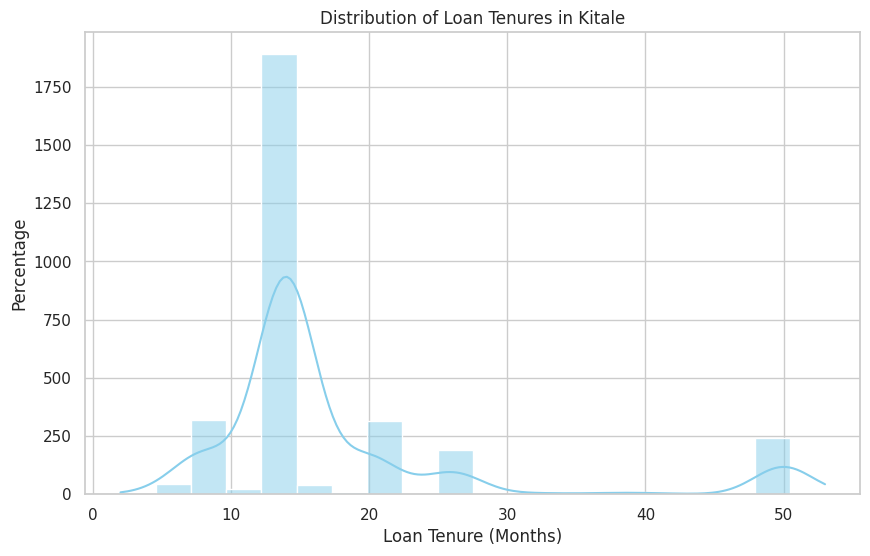

In [ ]:
# Extract rows with 'Kitale' in the 'region' column
kitale_rows = filtered_kiva_loans[filtered_kiva_loans['region'] == 'Kitale']

# Calculate the most preferred loan tenure in Kitale
most_preferred_tenure = kitale_rows['term_in_months'].mode().values[0]

# Plot a distribution plot for loan tenures in Kitale
plt.figure(figsize=(10, 6))
sns.histplot(data=kitale_rows, x='term_in_months', bins=20, kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Loan Tenure (Months)')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Tenures in Kitale')
plt.show()


# Insight 32 : The loan tenure of most of the people from Kitale, Kenya who have borrowed money from Kiva is around 14 months

<hr><hr><hr>

# Not Necessary

In [ ]:
filtered_kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [ ]:
filtered_kiva_loans['currency'].value_counts()

PHP    160440
KES     75311
USD     41227
PEN     21401
PYG     11898
Name: currency, dtype: int64

In [ ]:
kenya_currencies = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']['currency'].unique()

# Print or use the unique currency values
print(kenya_currencies)


['KES' 'USD']


In [ ]:
kenya_kes_rows = filtered_kiva_loans[(filtered_kiva_loans['country'] == 'Kenya') & (filtered_kiva_loans['currency'] == 'KES')]

# Print the number of rows
print("Number of rows where country is Kenya and currency is KES:", len(kenya_kes_rows))


Number of rows where country is Kenya and currency is KES: 75311


In [ ]:
filtered_kiva_loans[(filtered_kiva_loans['country'] == 'Kenya')].shape

(75825, 20)

In [ ]:
filtered_kiva_loans[(filtered_kiva_loans['country'] == 'Kenya')].shape

(75825, 20)

In [ ]:
# Assuming 'your_dataframe' is the name of your DataFrame
conversion_rate = 0.0062

# Create a copy of the original DataFrame
updated_dataframe = filtered_kiva_loans.copy()

# Select rows where country is Kenya and currency is KES
kenya_kes_rows = updated_dataframe[(updated_dataframe['country'] == 'Kenya') & (updated_dataframe['currency'] == 'KES')]

# Convert 'funded_amount' column to USD for selected rows
kenya_kes_rows['funded_amount_usd'] = kenya_kes_rows['funded_amount'] * conversion_rate

# Update 'currency' column to 'USD' for selected rows
kenya_kes_rows['currency'] = 'USD'

# Print the updated DataFrame
print(updated_dataframe)


             id  funded_amount  loan_amount             activity  \
5       1080148          250.0        250.0             Services   
46       653185          250.0        250.0  Fruits & Vegetables   
49       653418          450.0        450.0        General Store   
51       653092          175.0        175.0                 Pigs   
52       653149          175.0        175.0                 Pigs   
...         ...            ...          ...                  ...   
671200  1340323            0.0         25.0            Livestock   
671201  1340316           25.0         25.0            Livestock   
671202  1340334            0.0         25.0                Games   
671203  1340338            0.0         25.0            Livestock   
671204  1340339            0.0         25.0            Livestock   

               sector                                                use  \
5            Services  purchase leather for my business using ksh 20000.   
46               Food  to purch

In [ ]:
# Select all rows where country is Kenya
kenya_rows = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya'].copy()

# Remove rows where currency is KES
kenya_rows_no_kes = kenya_rows[kenya_rows['currency'] != 'KES']

# Print the resulting DataFrame without rows with KES currency
print(kenya_rows_no_kes)


             id  funded_amount  loan_amount                   activity  \
18024    671072         1500.0       1500.0                     Health   
18028    671105         1200.0       1200.0                     Health   
18551    671065          600.0        600.0                     Health   
18614    672011          900.0        900.0                     Health   
18616    671748         1500.0       1500.0                     Health   
...         ...            ...          ...                        ...   
581911  1243529         2125.0      30000.0                     Energy   
603786  1265287        30000.0      30000.0                     Energy   
614869  1277100        50000.0      50000.0           Furniture Making   
621860  1283951        50000.0      50000.0  Renewable Energy Products   
636486  1298882        36000.0      36000.0              Manufacturing   

               sector                                                use  \
18024          Health  To provide c

In [ ]:
kenya_rows_no_kes['currency'].unique()

array(['USD'], dtype=object)

<hr>
<hr>
<hr>

## Top activities & Uses of loans in Kenya

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Calculate the top activities with the most number of loans
top_activities = kenya_loans['activity'].value_counts().head()

# Calculate the sectors with the most loan amounts
top_activities_loan_amounts = kenya_loans.groupby('activity')['funded_amount'].sum().sort_values(ascending=False).head()

In [ ]:
top_activities

Farming                20555
Agriculture             5244
Dairy                   3983
General Store           3830
Fruits & Vegetables     2989
Name: activity, dtype: int64

In [ ]:
top_activities_loan_amounts

activity
Farming          10745600.0
Agriculture       2633110.0
Dairy             1660250.0
General Store     1256230.0
Retail            1137500.0
Name: funded_amount, dtype: float64

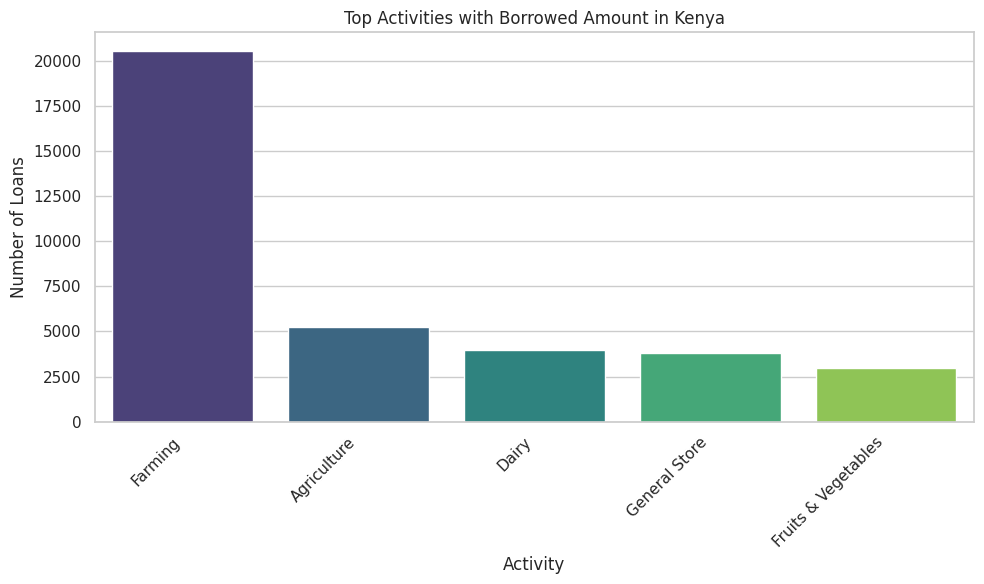

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_activities.index, y=top_activities.values, palette='viridis')

# Set labels and title
plt.xlabel('Activity')
plt.ylabel('Number of Loans')
plt.title('Top Activities with Borrowed Amount in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 27 : Farming, Agriculture, Dairy are the activities for which most of the people from Kenya have taken loans

- Farming :               20555
- Agriculture :            5244
- Dairy :                  3983
- General Store :          3830
- Fruits & Vegetables :    2989

# Insight 28 : Farming, Agriculture, Dairy are the activities with the highest loan amount from Kenya

- Farming :         10745600.0
- Agriculture :      2633110.0
- Dairy :            1660250.0
- General Store :    1256230.0
- Retail :           1137500.0

In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [ ]:
loan_themes.head()

In [ ]:
mpi_region_locations.head()

In [ ]:
country_stats.head()

In [ ]:
countries.head()

In [ ]:
filtered_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,2014-01-02 18:40:01+00:00,13.0,7,#Vegan,female,irregular,2014-01-02
49,653418,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,81.0,2014-01-02 22:17:55+00:00,2013-12-21 08:00:00+00:00,2014-01-30 00:19:42+00:00,14.0,18,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02
51,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02


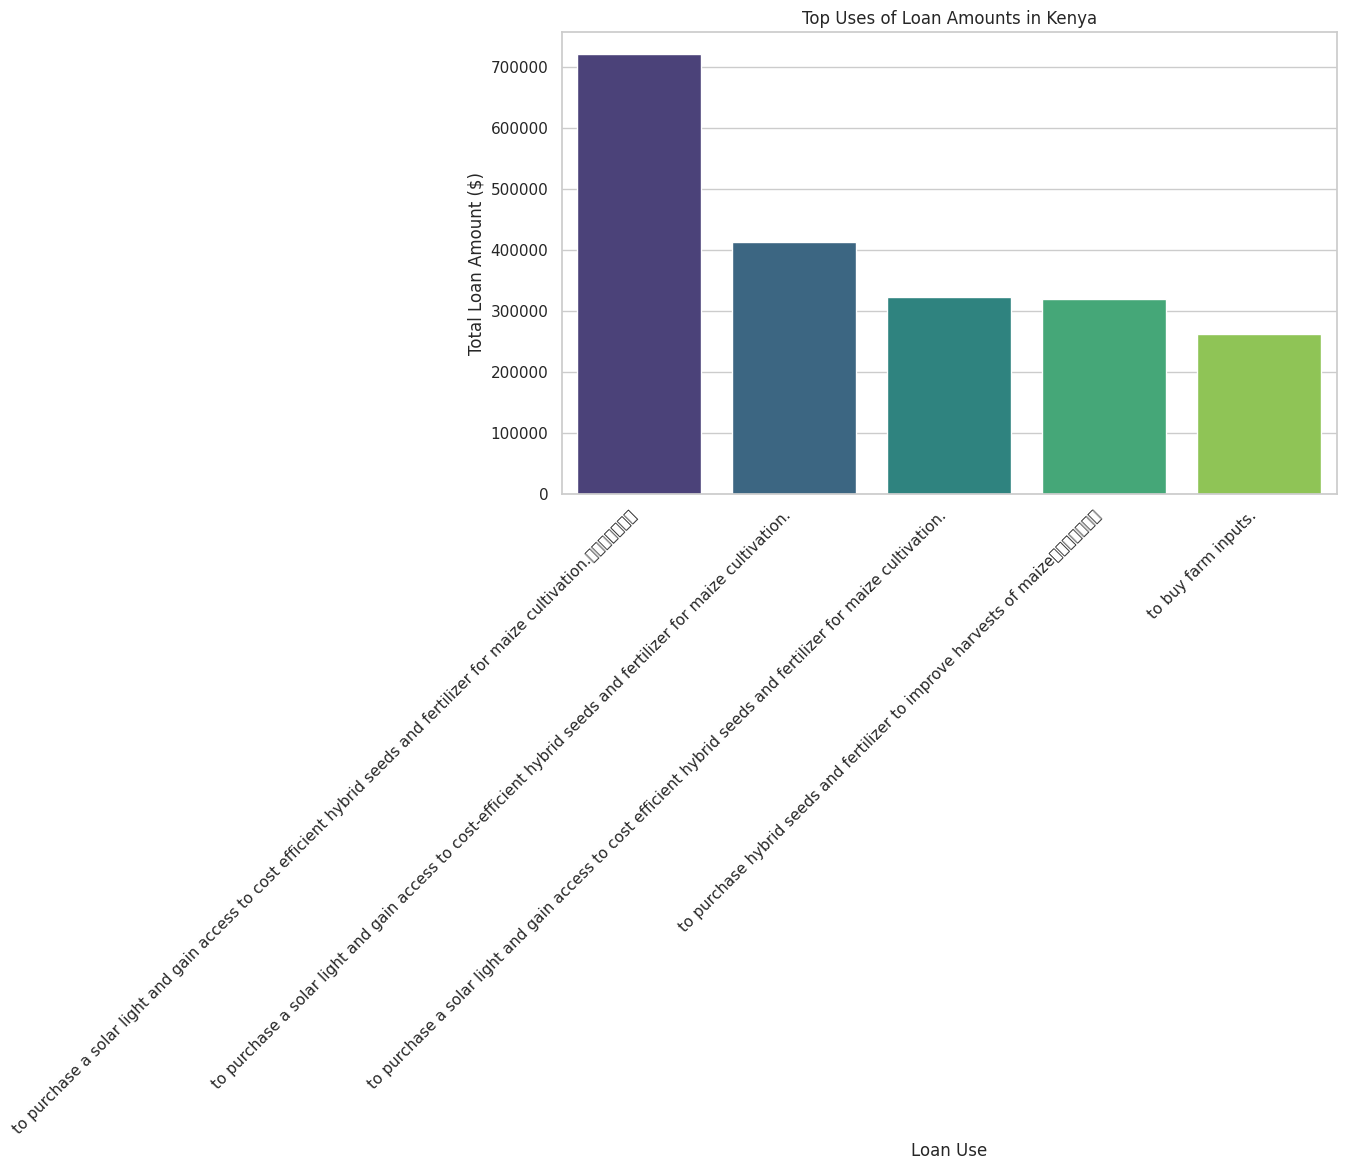

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Calculate the top uses of loan amounts in Kenya
top_loan_uses = kenya_loans.groupby('use')['loan_amount'].sum().nlargest(5)

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_loan_uses.index, y=top_loan_uses.values, palette='viridis')

# Set labels and title
plt.xlabel('Loan Use')
plt.ylabel('Total Loan Amount ($)')
plt.title('Top Uses of Loan Amounts in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


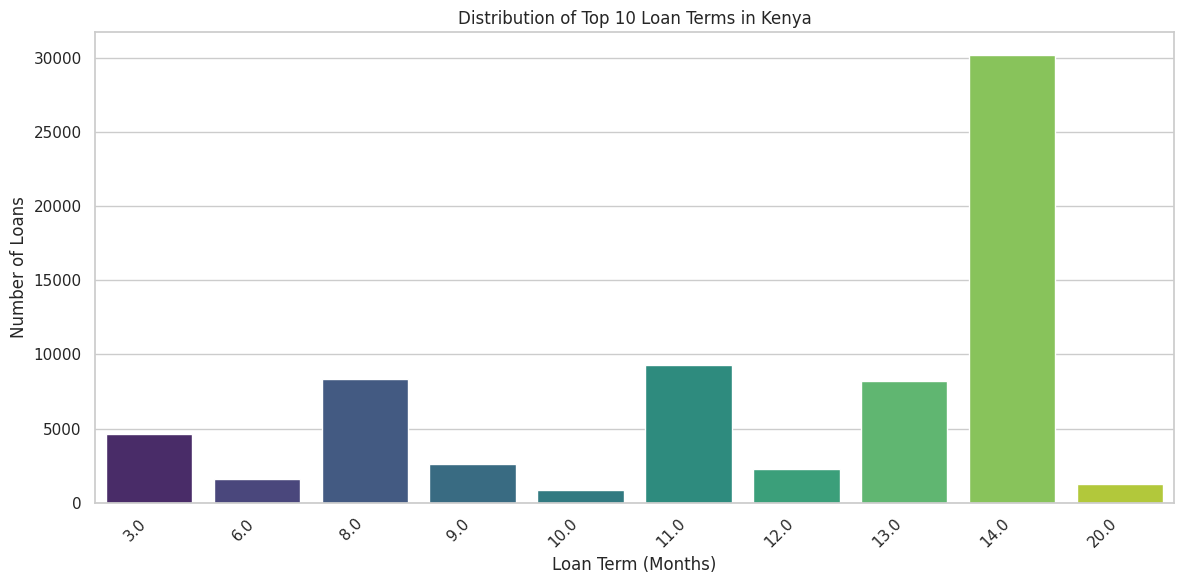

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = kiva_loans[kiva_loans['country'] == 'Kenya']

# Get the top 10 loan terms
top_loan_terms = kenya_loans['term_in_months'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 loan terms
kenya_top_loan_terms = kenya_loans[kenya_loans['term_in_months'].isin(top_loan_terms)]

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='term_in_months', data=kenya_top_loan_terms, palette='viridis')

# Set labels and title
plt.xlabel('Loan Term (Months)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Top 10 Loan Terms in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


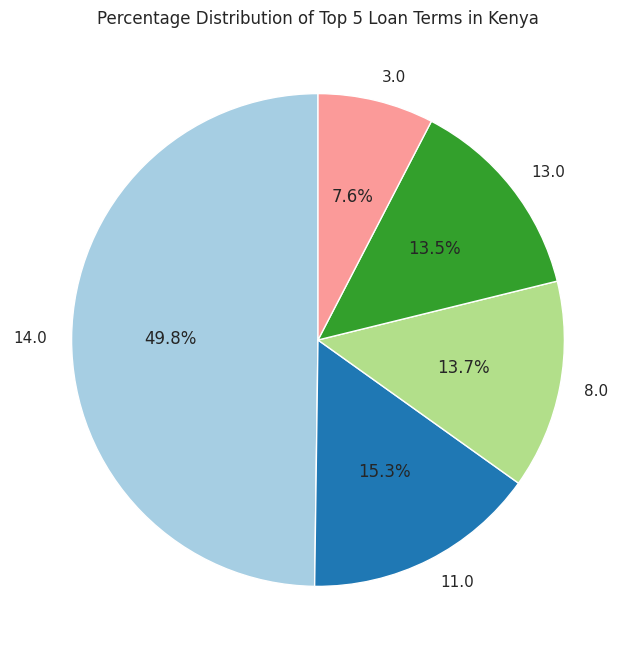

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Get the top 5 loan terms
top_loan_terms = kenya_loans['term_in_months'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 loan terms
kenya_top_loan_terms = kenya_loans[kenya_loans['term_in_months'].isin(top_loan_terms)]

# Calculate the percentage distribution
term_percentage = kenya_top_loan_terms['term_in_months'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(term_percentage, labels=term_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Top 5 Loan Terms in Kenya')
plt.show()


 We can see that the distribution of borrower’s repayment is imbalanced. The 'irregular' repayment interval (25.6 %)  appears to have a much higher count compared to others. The 'weekly' repayment interval (0.8 %)  has a very small percentage, You can observe the relative proportions of 'monthly' (61.0 %) and 'bullet' (12.6 %) repayment intervals compared to the overall distribution.

### 7. Top Uses of the Loans


In [ ]:
Kenya_country = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']
## I noticed that some of the data is inconsistant and are basically repeated because of upper/lower case difference.
Kenya_country.use = Kenya_country.use.str.lower()
## Also I stumbled upon lines where the only difference is a ".". So, I got rid of the difference.
Kenya_country.use =Kenya_country.use.str.strip('.')
## Its always a good idea to get rid of any extra white spaces.
Kenya_country.use =Kenya_country.use.str.strip()
Kenya_country.use = Kenya_country.use.str.strip('.')

##There are different version so saying the same thing. therefore I have decided to merge them all together.
Kenya_country.replace('to buy a water filter to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for his family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter, to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter, to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for their families', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to purchase a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to purchase a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter in order to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)

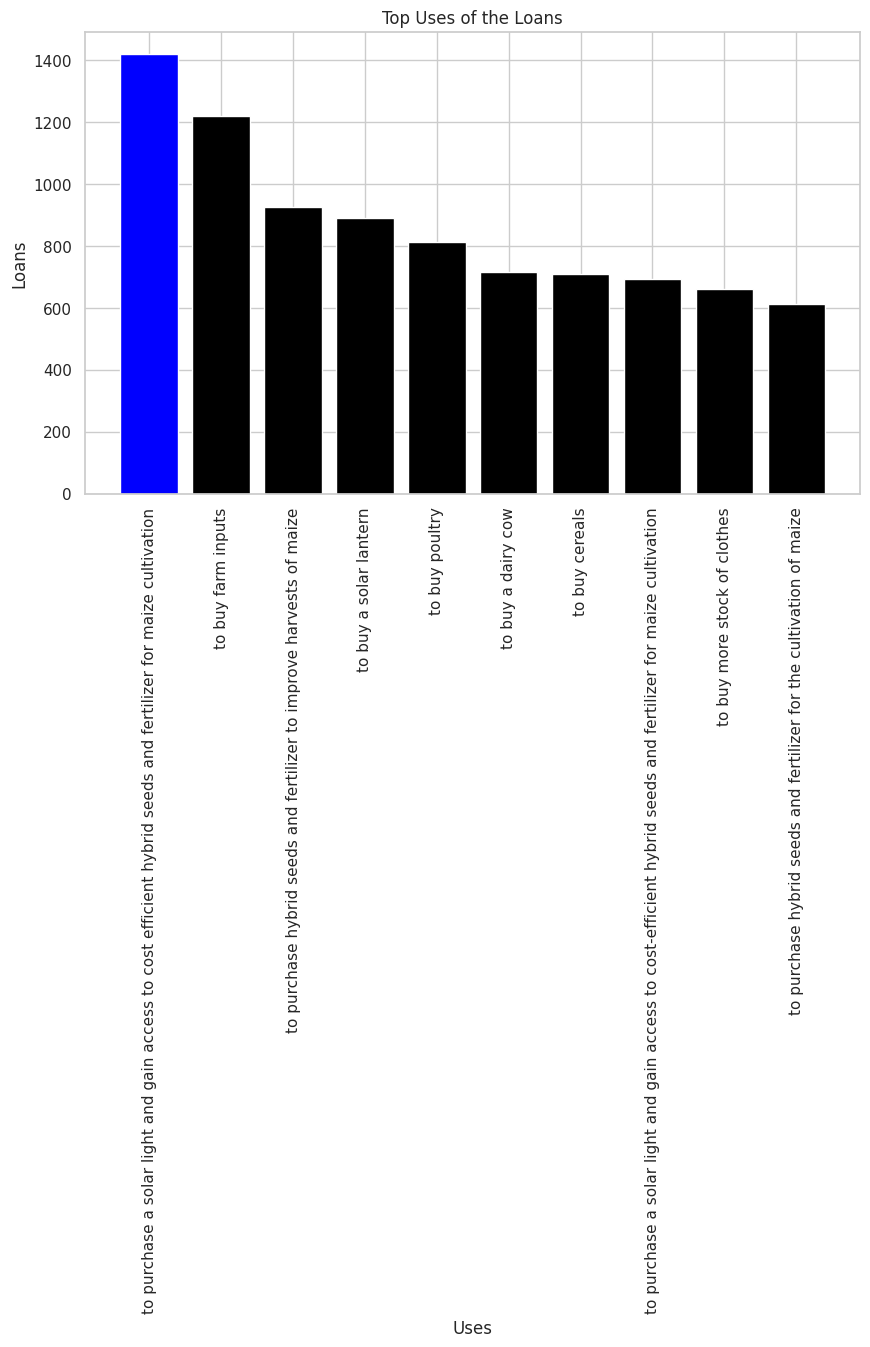

In [ ]:
temp =Kenya_country.use.value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color=['blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'])

plt.title("Top Uses of the Loans")
plt.xlabel("Uses")
plt.ylabel("Loans")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


### Insight

### 8. Male-Female Ratio

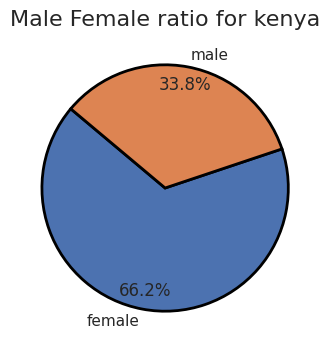

In [ ]:
Kenya_country
temp = pd.DataFrame(Kenya_country.borrower_genders.dropna().str.split(",").tolist()).stack().value_counts().reset_index()
temp.rename(columns={'index':'gender', 0:'total'}, inplace=True)
temp.gender = temp.gender.apply(lambda x: x.strip())
temp = temp.groupby(['gender'])['total'].sum().reset_index()

labels = temp.gender
values = temp.total

plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})

plt.title("Male Female ratio for kenya", fontsize=16)
plt.show()


## Insight

<hr>
<hr>
<hr>
<hr>

From this chart, we can see that 66.2 % of females age making regular payments as compared to male(33.8 %)

In [ ]:
countries.replace("Congo, Dem. Rep.", 'Democratic Republic of the Congo', inplace=True)

countries.rename(columns = {'GDP ($ per capita)':"GDP"}, inplace = True)
countries.rename(columns = {'Pop. Density (per sq. mi.)':"pop_density_per_sq_mile"}, inplace = True)
countries.pop_density_per_sq_mile = countries.pop_density_per_sq_mile.apply(lambda x: int(x.replace(",","")))
countries.Country = countries.Country.apply(lambda x:x.strip())
country_stats = country_stats.merge(countries[['Country',"GDP",'pop_density_per_sq_mile']], left_on ='country_name',right_on='Country', how='left')


AttributeError: 'numpy.ndarray' object has no attribute 'replace'

### 9. Most Populated regions in Kenya

In [ ]:
# Merge the datasets on the common columns 'country' and 'Country'
merged_data = pd.merge(Kenya_country, countries, left_on='country', right_on='Country', how='left')

# Group data by region and sum up the populations
region_data = merged_data.groupby('region')['Population'].sum().reset_index()

# Sort data by population in descending order and select top 5
top5_regions = region_data.sort_values(by='Population', ascending=False).head(5)

# Plot the bar graph
sns.barplot(x='region',y='Population', data=top5_regions)

# Customize the plot
plt.title('Top 5 Populated Regions in Kenya')
plt.xlabel('Population')
plt.ylabel('Region')

# Show the plot
plt.show()


TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

From above graph we can see that Kissi, Kitale, Eldoret , Webuye and Kisumu are most populated regions from kenya country.

Other Insights:


13.Population Density

In [ ]:
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile','population','population_below_poverty_line']].sort_values(by = 'population', ascending = False).head(14)
for col in temp.columns:
    temp[col] = temp[col].astype(str)
temp['text'] = temp['kiva_country_name'] + '<br>' + 'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
temp['population_below_poverty_line'] = temp['population_below_poverty_line'].astype(float)
trace0 = go.Scatter(
    x=temp.population,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    marker = { 'color': temp.population_below_poverty_line.tolist(),
            #'colorscale':"RdYlGn",
            'size': (temp.pop_density_per_sq_mile/80).tolist(),
            'showscale': False,
            'line': dict(width=2, color='black')
        }
)
layout = go.Layout(
    paper_bgcolor='rgb(243, 243, 200)',## asix and lebel background color
    plot_bgcolor='rgb(243, 243, 200)', ## plot background color
    title = "Population, Population Density and Population Below Poverty Line",
    height = 800,
    xaxis = dict(     title = "Population"
    ),
    yaxis = dict(
        title = "Population Below Poverty Line"
    )

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

KeyError: "['pop_density_per_sq_mile'] not in index"

The big circle is the first thing to take my attention. Here **the size of the circle** represents the **population density** of each country while x and y-axis represent population and population below poverty line consecutively. That represents **Bangladesh** which is not only one of the countries with top populations but also one of the most densely populated countries in the world. In addition to that **Bangladesh** has a score of 31.5 in the Population below poverty line scale. Speaking of that scale, **Nigeria** is the poorest country with lots of people to appreciate assistance from KIVA.

14.Population Below Poverty Line


In [ ]:
data = [dict(
        type='choropleth',
        locations= country_stats.country_name,
        locationmode='country names',
        z=country_stats.population_below_poverty_line,
        text=country_stats.country_name,
        marker=dict(
#             colorscale='Red',
            line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False,
            tickprefix='',
            title='Polulation<br>below<br>poverty<br>line'),
)]
layout = dict(title = 'Population Below Poverty Line',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

Most of the countries in Africa live way below poverty line. This may be a good time to bring up GDP per capita since they are nege.Let's create a map for that as well.

15.GDP Per Capita

In [ ]:
temp = countries[["Country","GDP"]].sort_values(by = 'GDP', ascending = False)
data = [dict(
        type='choropleth',
        locations= temp.Country,
        locationmode ='country names',
        z=temp.GDP,
        text=temp.Country,
        colorscale='BuGn',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False,
            tickprefix='', title='GDP<br>Per<br>Capita'),
)]
layout = dict(title = 'World countries with polulations',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

**North American**, **Austrailan** and **European** countries are the ones with the highest GDP Per Capita. Meanwhile, countries in** Africa** and Asia are the ones with the lowest GDP Per Capita.

In [ ]:
kiva_loans['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [ ]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [ ]:
temp = pd.DataFrame(filtered_kiva_loans.borrower_genders.dropna().str.split(",").tolist()).stack().value_counts().reset_index()
temp.rename(columns={'index':'gender', 0:'total'}, inplace=True)
temp.gender = temp.gender.apply(lambda x: x.strip())
temp = temp.groupby(['gender'])['total'].sum().reset_index()
print(temp)


   gender   total
0  female  338069
1    male  105724


<Axes: xlabel='gender', ylabel='total'>

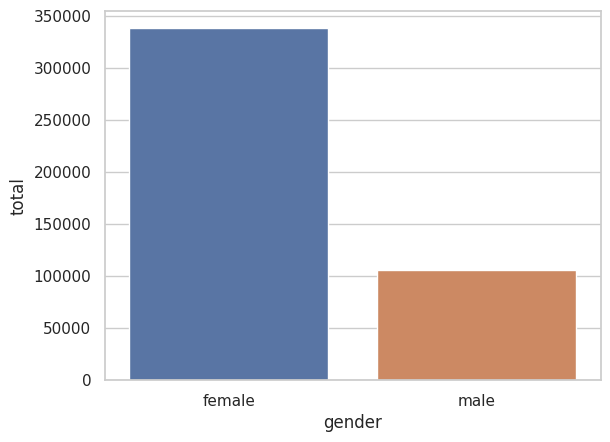

In [ ]:
sns.barplot(x='gender',y='total',data=temp)

In [ ]:
loan_themes['loan_theme_type'].nunique()

170

In [ ]:
loan_themes.columns

Index(['partner_id', 'field_partner_name', 'sector', 'loan_theme_id',
       'loan_theme_type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

From the above analysis, we concluded that the **Philippines** is the country that received the Most Funded Amounts i.e **62.07%** means **54,47,638 $ and  
    Kenya country is at rank second with the most Funded Amounts i.e. 29.33%** means** 32,000 $**. When we check which country makes regular payments **Kenya** country is at top country who makes** regular payments**. From Kenya country, 2.15% of loans are given to **Cusco** means,**1.37%** of loans are given to **Kisii**, and 1.28% of loans are given to Palo, and Leyte these are the regions with the most amount of funds.
       


For the next analysis, we choose these regions from Kenya country.

**

1.   Agriculture, Food, retail, Services,and Clothing** are the top sectors with the most loan counts.

2.Farming, Agriculture, Dairy, General store, and Retail are the top activities done by loan borrowers in Kenya country.

3.For Kenya CountryLoan payment is for 11 and 14 months.

4.We can see that the distribution of borrower’s repayment is imbalanced.






*   The 'irregular' repayment interval (25.6 %) appears to have a much higher count compared to others.

*   The 'weekly' repayment interval (0.8 %) is a very small percentage.

*   The relative proportions of 'monthly' (61.0 %) and

*   The  'bullet' (12.6 %) repayment intervals compared to the overall distribution.



**Uses of Loans**-

1.   Most people took loans to purchase a solar light and gain access to cost-efficient hybrid seed fertilizer for maize cultivation,

2.   To buy farm inputs, and

3.   To buy hybrid seeds and fertilizer to improve the harvest of maize.










*   Payment interval based on gender

 we can see that 66.2 % of females are making regular payments as compared to males (33.8 %).

*   We can see that Kissi, Kitale, Eldoret, Webuye, and Kisumu are the most populated regions in Kenya country.




**Other Insights:**

* High Density country-
Bangladesh is  with more densely populated country.
*   GDP per capita
    North American, Australian and European countries are the ones with the highest GDP Per Capita. Meanwhile, countries in Africa and Asia are the ones with the lowest GDP Per Capita.

*    Population below the poverty line-Nigeria is the poorest country with lots of people to appreciate assistance from KIVA.
Most of the countries in Africa live way below the poverty line.



